                                          ## Insurance Company Expenses
## SA2 Homework Assignment



##### Problem Description:<br>
Like every other business, insurance companies seek to minimize expenses associated with doing business in order to enhance profitability. To study expenses, we examine a random sample of 384 insurance companies from the National Association of Insurance Commissioners (NAIC) database of over 3,000 companies. The NAIC maintains one of the world’s largest insurance regulatory databases; we consider here data that is based on 2005 annual reports for all the property and casualty insurance companies in United States. The annual reports are financial statements that use statutory accounting principles. 



#####  Source:

National Association of Insurance Commissioners (NAIC)<br>

##### Goal<br>
<ul>
<li>
Our goal is to fit a suitable linear regression model that explains the expenses of the insurance companies</li>
<li>As part of your report present an exploratory data analysis along with the model built, stating clearly every step you take along with the reasons/justification for taking said steps</li>
<li>Marks will be awarded for your interpretations, remarks and suggestions rather than just the models and outputs</li>
<li>The description of each of the variable used in the dataset is given below</li>
</ul>

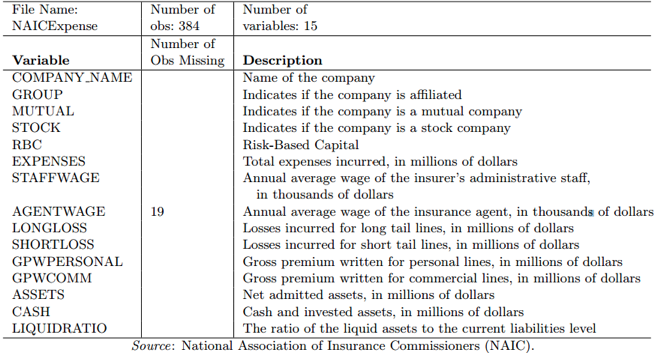

##### Model Assumption:

Following are assumptions of model.
1. Residuals should be normally distributed. 
2. Residuals should be random and independent.
3. Independent variables (IVs) should not be linearly co-related to each other.
4. Residuals should have equal variance.

##### Final Model:

model4.1 = lm(EXPENSES ~ LONGLOSS + SHORTLOSS + GPWPERSONAL + GPWCOMM + ASSETS + 
    CASH + LIQUIDRATIO + RBC_sq + LONGLOSS_sq + SHORTLOSS_sq + 
    GPWCOMM_sq + ASSET_sq + CASH_sq + LIQUIDRATIO_sq, data=trainingData1)
    
##### Final Model Coefficients:

(Intercept) -0.00734693921077586 <br/>
LONGLOSS 0.407297431772373 <br/>
SHORTLOSS 0.398500533874459 <br/>
GPWPERSONAL 0.0159350273611598 <br/>
GPWCOMM 0.0662961066318738 <br/>
ASSETS -0.230303404522066 <br/>
CASH 0.272292303047284 <br/>
LIQUIDRATIO 0.000474353752276749 <br/>
RBC_sq -1.86630148240256e-25 <br/>
LONGLOSS_sq 0.563978937477832 <br/>
SHORTLOSS_sq -0.293341103627013 <br/>
GPWCOMM_sq 0.0117888982004855 <br/>
ASSET_sq 0.024319274795688 <br/>
CASH_sq -0.0269171770576768 <br/>
LIQUIDRATIO_sq -4.00219998266584e-06 <br/>


##### Final Model Statitics:

Multiple R-squared:  0.9695 <br/>
Adjusted R-squared:  0.9681 <br/>
RMSE for validation data : 0.837052 <br />

##### Conclusion:

The analysis is not over. We were able to fit the best model with the constraint of a particular dataset. Going forward one can try to get data on other variables that might have an impact on the pridictibility of Expenses. On the other hand, we should not include variables only to achieve a high R2, i.e. we must not over fit our model.

In [2]:
library(car)
library(MASS)
library(corpcor)
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyverse)
library(reshape2)
library(perturb)

In [3]:
data = read.csv("/Users/a5sharma/Documents/ISB/SA2/Assignment/data/NAICExpense.csv",header = T,sep=",",stringsAsFactors = F, na.strings = c("NA", "N/A", "?",""))

In [4]:
head(data)

COMPANY_NAME,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
Tift Area Captive Ins Co,0,0,1,228184000,0.0008019802,84.40508,77.46100,0.0001873308,0.000000000,0.000000000,0.001375438,0.002949942,0.003258406,110.45661
Alliance Of Nonprofits For Ins RRG,0,0,0,1627708000,0.0044878635,81.56754,84.87802,0.0027822909,0.000000000,0.000000000,0.012272512,0.022170349,0.019760347,89.12961
GA Timber Harvesters Mut Captive,0,1,0,422907000,0.0019045075,84.40508,77.46100,0.0010121463,0.001329539,0.000000000,0.005028351,0.004617343,0.003499702,75.79472
American Natl Lloyds Ins Co,1,0,0,652906000,0.0022909382,82.49788,75.71071,0.0000000000,0.002979557,0.029545038,0.001986159,0.043719914,0.040934885,93.62984
Chubb Natl Ins Co,1,0,1,8124624000,0.0182956574,79.26495,78.24790,0.0107939577,0.011777314,0.040614120,0.058094479,0.144773034,0.138424153,95.61460
Harleysville Ins Co of OH,1,0,1,1441725000,0.0049830133,84.35856,77.41831,0.0019387476,0.003797946,0.001448431,0.013375740,0.029204831,0.029965958,102.60617


In [5]:
names(data)

[1] "COMPANY_NAME" "GROUP"        "MUTUAL"       "STOCK"        "RBC"         
 [6] "EXPENSES"     "STAFFWAGE"    "AGENTWAGE"    "LONGLOSS"     "SHORTLOSS"   
[11] "GPWPERSONAL"  "GPWCOMM"      "ASSETS"       "CASH"         "LIQUIDRATIO"

In [6]:
str(data)

'data.frame':	384 obs. of  15 variables:
 $ COMPANY_NAME: chr  "Tift Area Captive Ins Co" "Alliance Of Nonprofits For Ins RRG" "GA Timber Harvesters Mut Captive" "American Natl Lloyds Ins Co" ...
 $ GROUP       : int  0 0 0 1 1 1 1 0 0 1 ...
 $ MUTUAL      : int  0 0 1 0 0 0 0 0 0 0 ...
 $ STOCK       : int  1 0 0 0 1 1 1 0 1 1 ...
 $ RBC         : num  2.28e+08 1.63e+09 4.23e+08 6.53e+08 8.12e+09 ...
 $ EXPENSES    : num  0.000802 0.004488 0.001905 0.002291 0.018296 ...
 $ STAFFWAGE   : num  84.4 81.6 84.4 82.5 79.3 ...
 $ AGENTWAGE   : num  77.5 84.9 77.5 75.7 78.2 ...
 $ LONGLOSS    : num  0.000187 0.002782 0.001012 0 0.010794 ...
 $ SHORTLOSS   : num  0 0 0.00133 0.00298 0.01178 ...
 $ GPWPERSONAL : num  0 0 0 0.0295 0.0406 ...
 $ GPWCOMM     : num  0.00138 0.01227 0.00503 0.00199 0.05809 ...
 $ ASSETS      : num  0.00295 0.02217 0.00462 0.04372 0.14477 ...
 $ CASH        : num  0.00326 0.01976 0.0035 0.04093 0.13842 ...
 $ LIQUIDRATIO : num  110.5 89.1 75.8 93.6 95.6 ...


In [7]:
data<-data[,-c(1)]

In [8]:
summary(data)

     GROUP           MUTUAL           STOCK             RBC           
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000e+00  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:6.257e+08  
 Median :1.000   Median :0.0000   Median :1.0000   Median :2.753e+09  
 Mean   :0.612   Mean   :0.1875   Mean   :0.6823   Mean   :2.247e+10  
 3rd Qu.:1.000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.118e+10  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :8.388e+11  
                                                                      
    EXPENSES           STAFFWAGE        AGENTWAGE         LONGLOSS        
 Min.   :-0.002038   Min.   : 51.73   Min.   : 47.47   Min.   :-0.070623  
 1st Qu.: 0.001584   1st Qu.: 80.06   1st Qu.: 74.81   1st Qu.: 0.000000  
 Median : 0.008504   Median : 84.38   Median : 78.77   Median : 0.001784  
 Mean   : 0.043190   Mean   : 87.18   Mean   : 80.15   Mean   : 0.024926  
 3rd Qu.: 0.029826   3rd Qu.: 93.82   3rd Qu.: 85.44   3r

## Exploratory data analysis

##### Univariate Analysis

We can see that from the below density plot that EXPENSES is skewed to right.

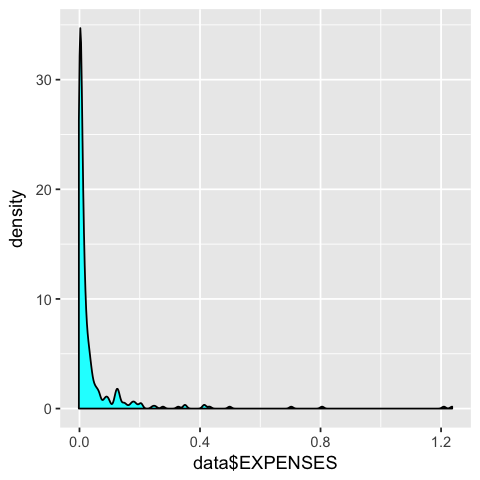

In [9]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data,aes(x=data$EXPENSES))+geom_density(fill="cyan")

In [10]:
Ndata <- data

Warning message:
“Removed 19 rows containing non-finite values (stat_bin).”

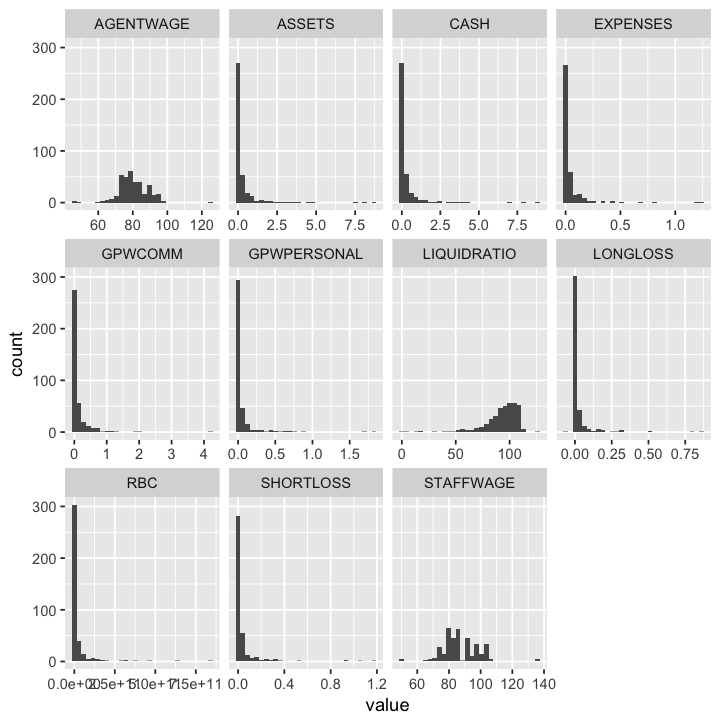

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
Ndata %>% gather(RBC:LIQUIDRATIO, key = "variable", value = "value") %>%
  ggplot(aes(x = value)) + 
  geom_histogram(bins = 30) + facet_wrap(~ variable, scales = 'free_x')

From the below boxplots, we can see that some variables are skewed to right and some variables are skewed to left. Also, we can see some variables have lot's of outliers.

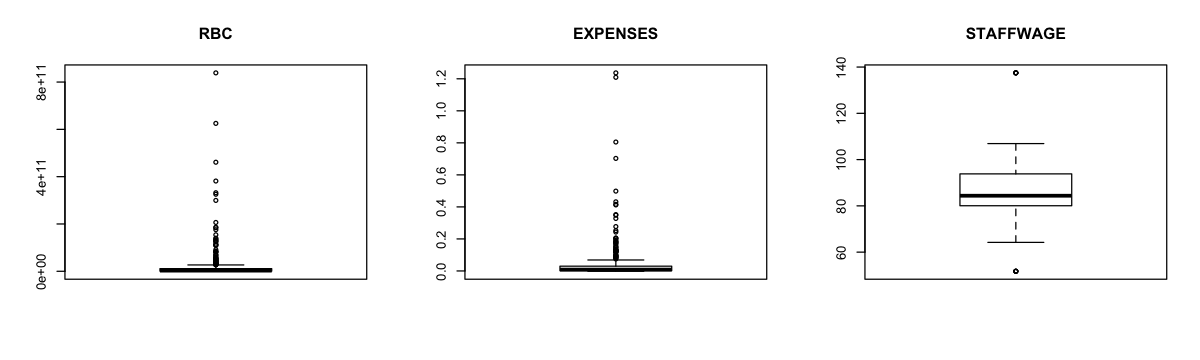

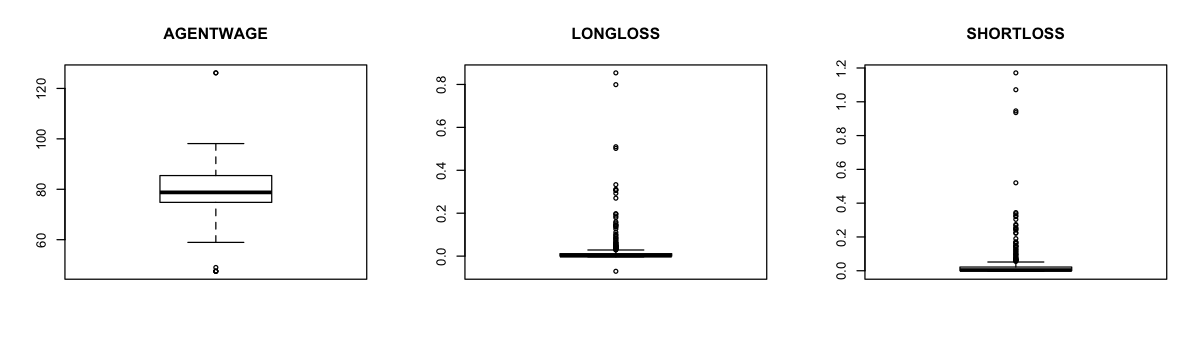

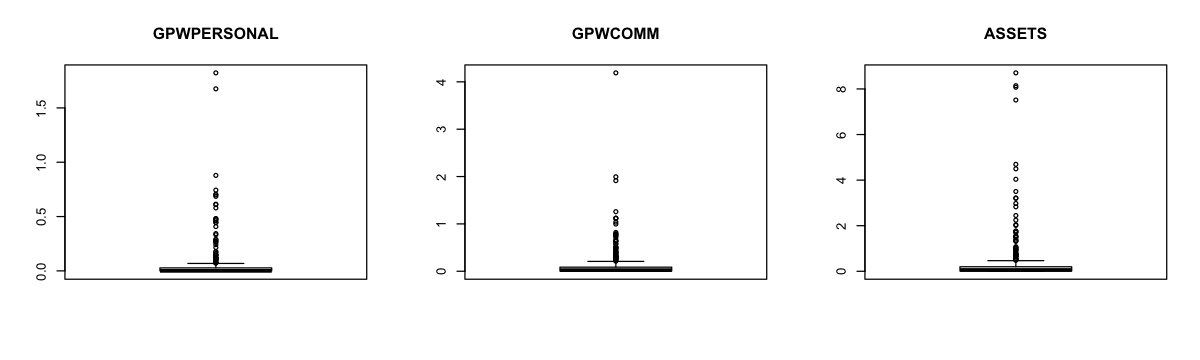

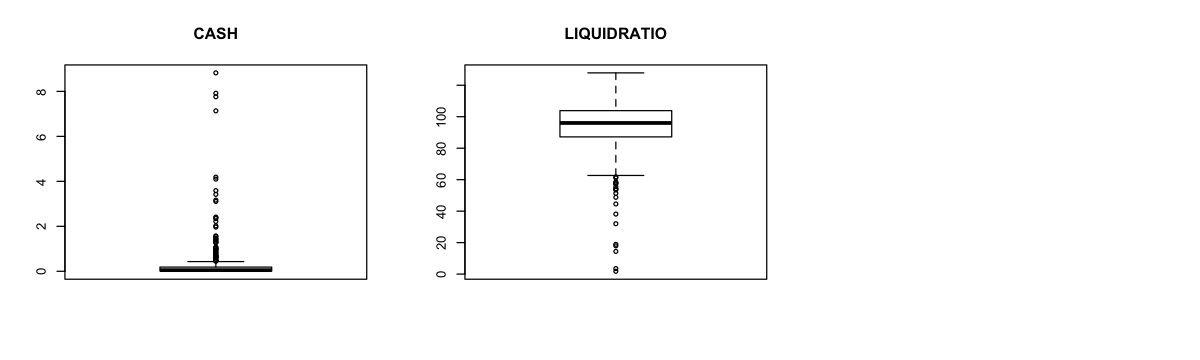

In [12]:
options(repr.plot.width=10, repr.plot.height=3)
n_col <- ncol(Ndata)
for (i in seq(4, ncol(Ndata), 3)){
    par(mfrow=c(1, 3))
    if (i < 11){
        boxplot(Ndata[i], main=names(Ndata)[i])
        boxplot(Ndata[i+1], main=names(Ndata)[i+1])
        boxplot(Ndata[i+2], main=names(Ndata)[i+2])
    }
    else{
        boxplot(Ndata[i], main=names(Ndata)[i])
        boxplot(Ndata[i+1], main=names(Ndata)[i+1])
    }
}

#####  Missing Data treatment

There is missing data in AGENTWAGE variable (19 observations).

In [13]:
for (i in seq(1:length(Ndata))){
    no_of_nul <- sum(is.na(Ndata[,i]))
    if(no_of_nul > 0){
        print(colnames(Ndata)[i])
        print(no_of_nul)
    }
}

[1] "AGENTWAGE"
[1] 19


In [14]:
summary(Ndata$AGENTWAGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  47.47   74.81   78.77   80.15   85.44  126.17      19 

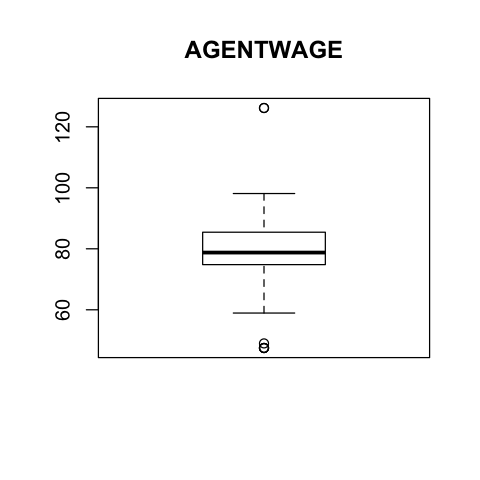

In [15]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(Ndata$AGENTWAGE, main="AGENTWAGE")

Distribution of AGENTWAGE seems normally distributed but little skewed to right. As distribution of AGENTWAGE seems normally distributed, We can impute missing data with it's mean.

In [16]:
Ndata$AGENTWAGE[is.na(Ndata$AGENTWAGE)] = mean(Ndata$AGENTWAGE, na.rm=TRUE)

In [17]:
for (i in seq(1:length(Ndata))){
    no_of_nul <- sum(is.na(Ndata[,i]))
    if(no_of_nul > 0){
        print(i)
        print(no_of_nul)
    }
}

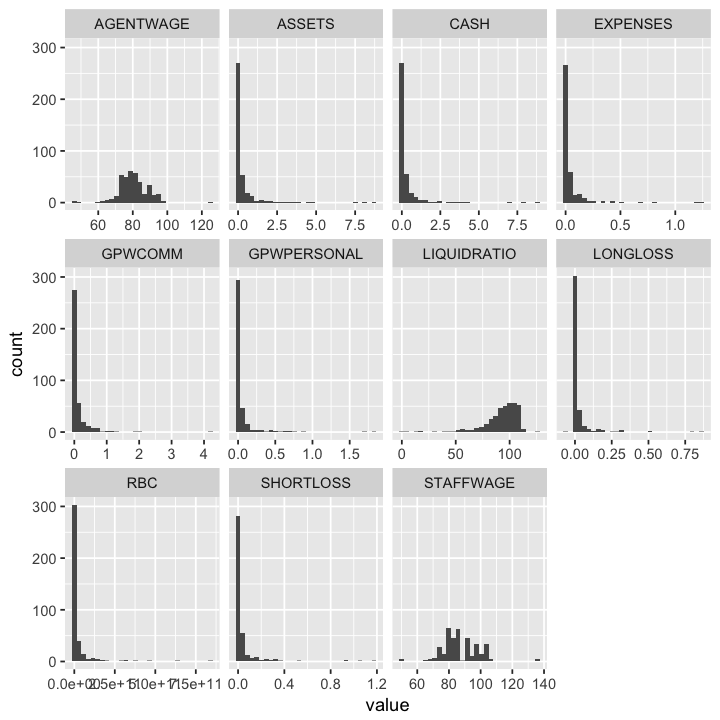

In [18]:
options(repr.plot.width=6, repr.plot.height=6)
Ndata %>% gather(RBC:LIQUIDRATIO, key = "variable", value = "value") %>%
  ggplot(aes(x = value)) + 
  geom_histogram(bins = 30) + facet_wrap(~ variable, scales = 'free_x')

Let's compare original data with their log and sqrt transformation. We can see from below box plots, data seems normally distributed for some variables after log transformation.

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”

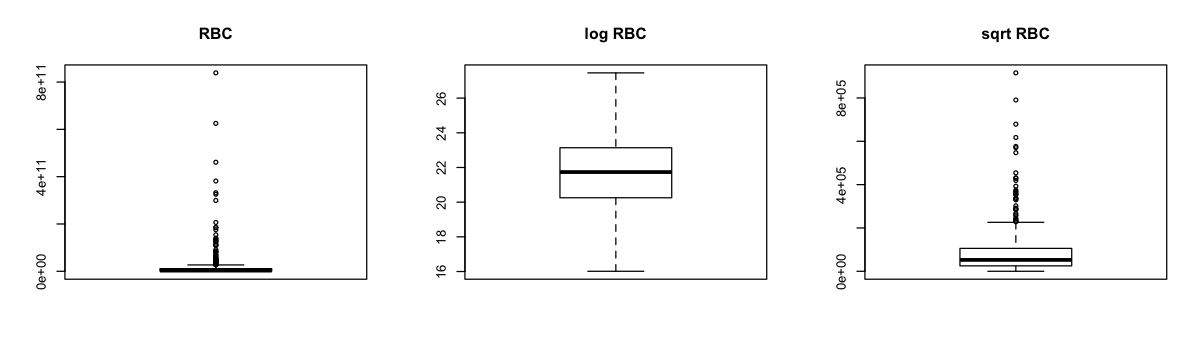

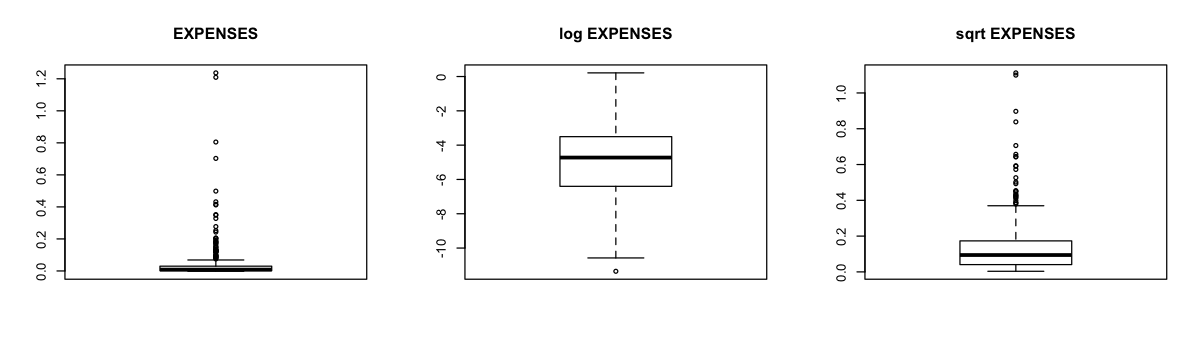

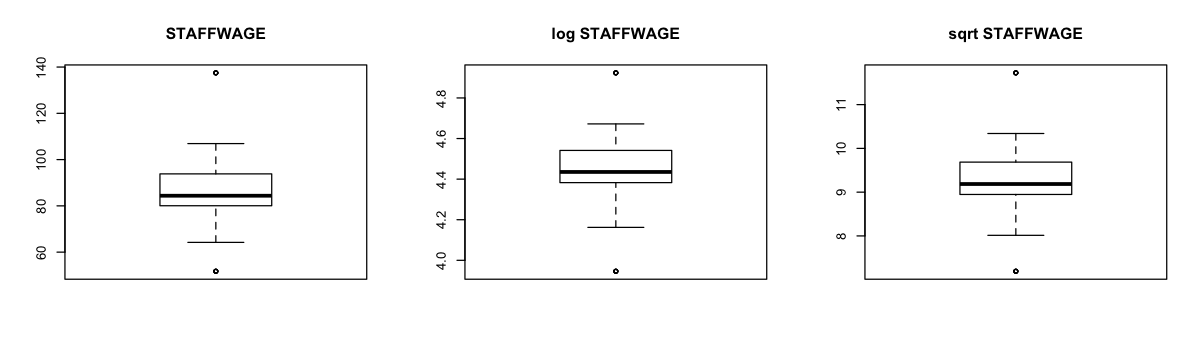

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”Warning message in FUN(X[[i]], ...):
“NaNs produced”

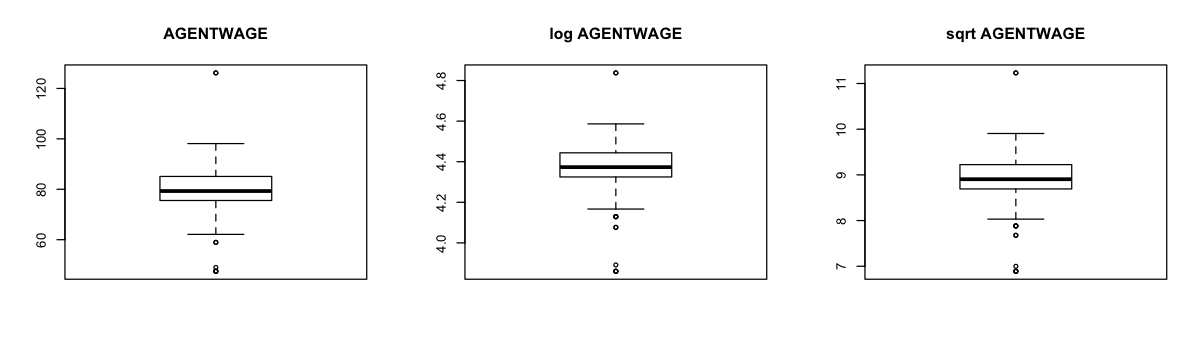

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”Warning message in FUN(X[[i]], ...):
“NaNs produced”

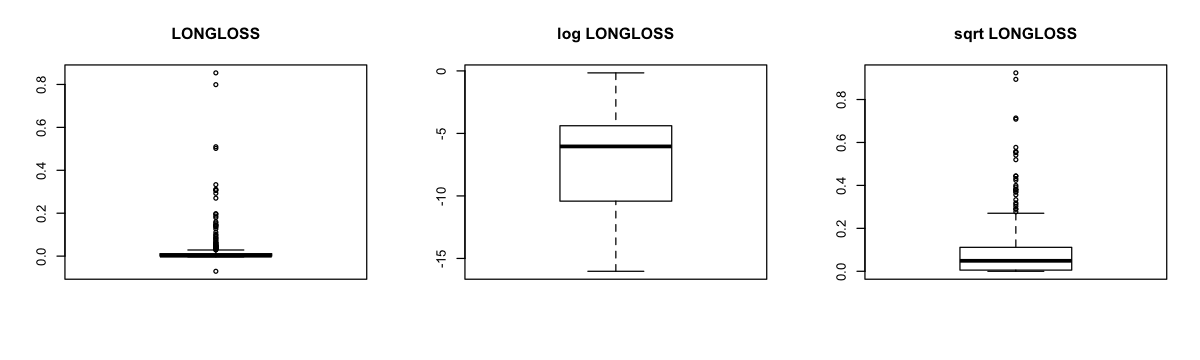

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”

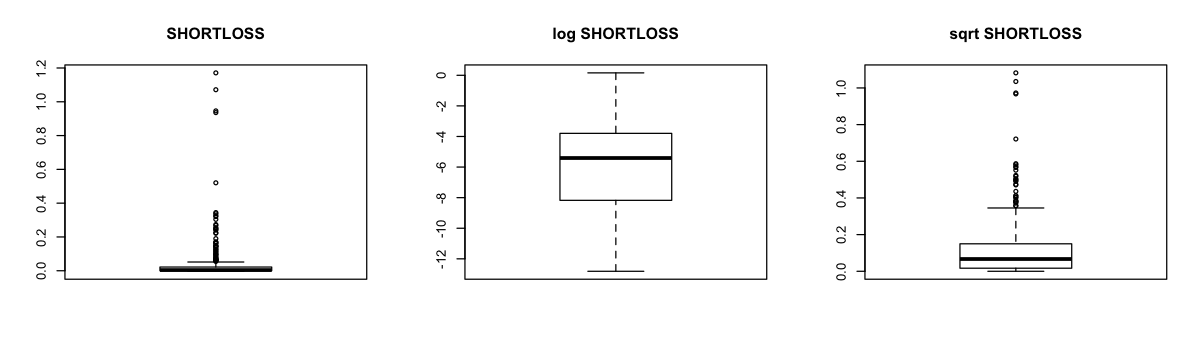

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
“Outlier (-Inf) in boxplot 1 is not drawn”Warning message in FUN(X[[i]], ...):
“NaNs produced”

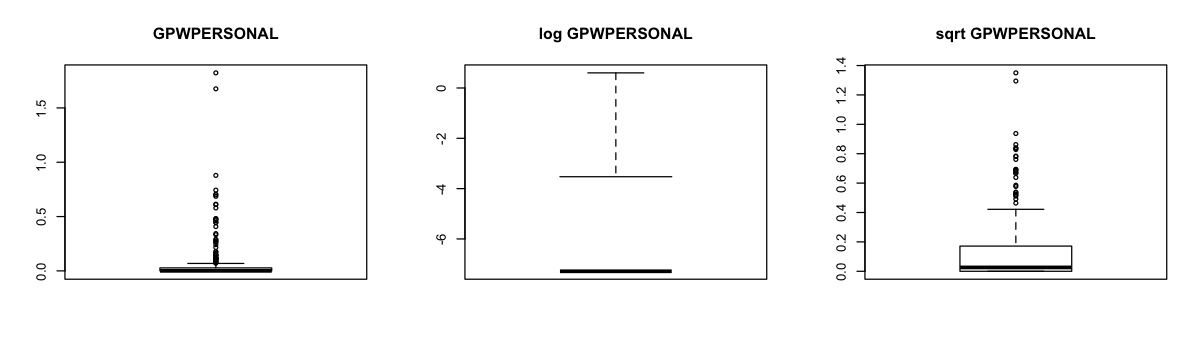

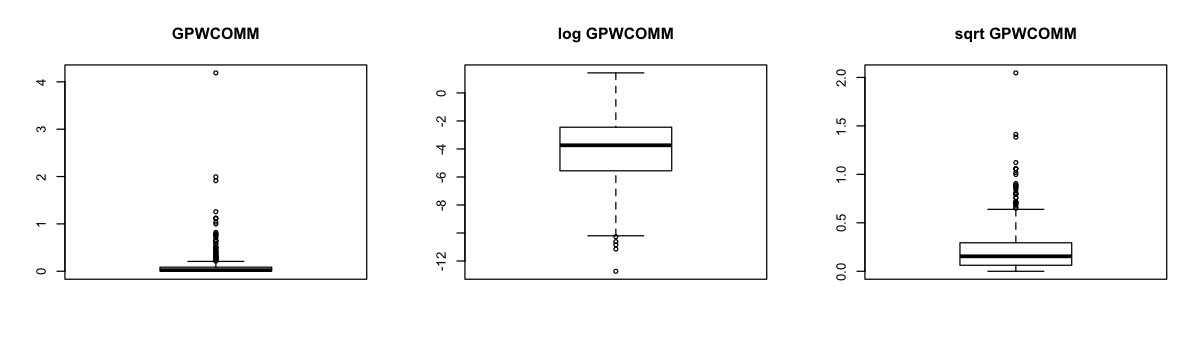

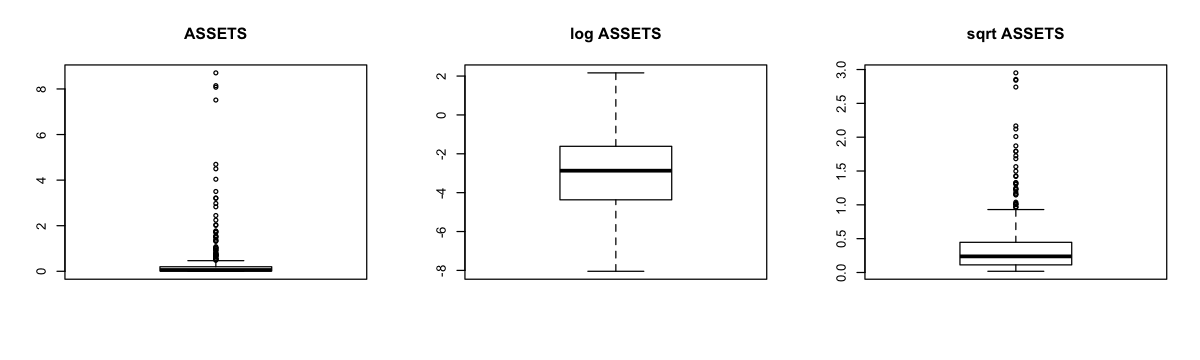

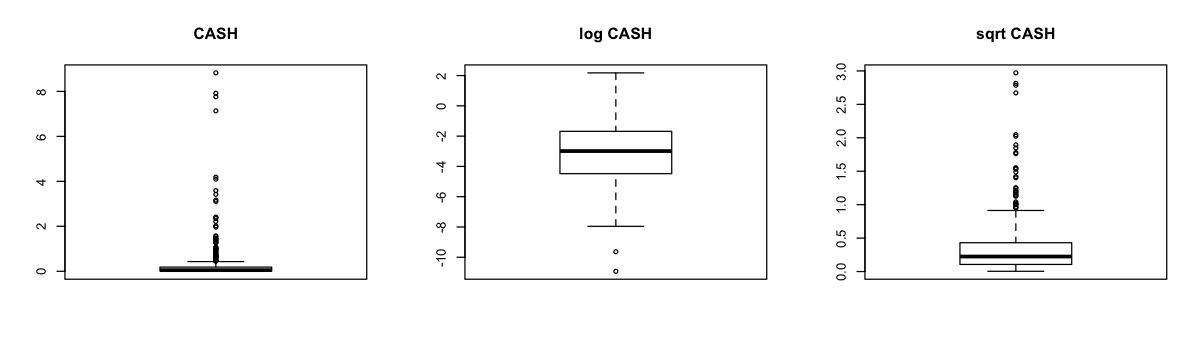

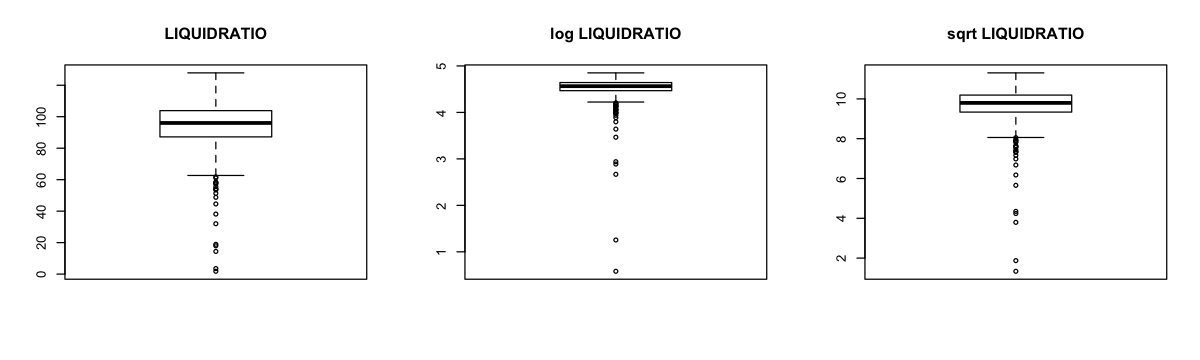

In [19]:
options(repr.plot.width=10, repr.plot.height=3)
n_col <- ncol(Ndata)
for (i in seq(4, ncol(Ndata))){
    par(mfrow=c(1, 3))
    title <- names(Ndata)[i]
    boxplot(Ndata[i], main=title)
    title <- paste("log", names(Ndata)[i])
    boxplot(log(Ndata[i]), main=title)
    title <- paste("sqrt", names(Ndata)[i])
    boxplot(sqrt(Ndata[i]), main=title)
}

##### Multivariate Analysis

### Corelation matrix and Scatterplots

From the below scatter plots and correlation heatmap, we can see that some variables are strongly correlated with each others.

Also, we can see that some variable are strongly correlated with response variable.

In [20]:
NumData <- Ndata[,-c(1,2,3)]
cor_coef <- round(cor(NumData),2)

From the below heatmap, we can see that there are many features which are highly corelated to each other.

In [21]:
melted_cormat <- melt(cor_coef)
# Get lower triangle of the correlation matrix
get_lower_tri<-function(cor_coef){
    cor_coef[upper.tri(cor_coef)] <- NA
    return(cor_coef)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cor_coef){
    cor_coef[lower.tri(cor_coef)]<- NA
    return(cor_coef)
}
upper_tri <- get_upper_tri(cor_coef)

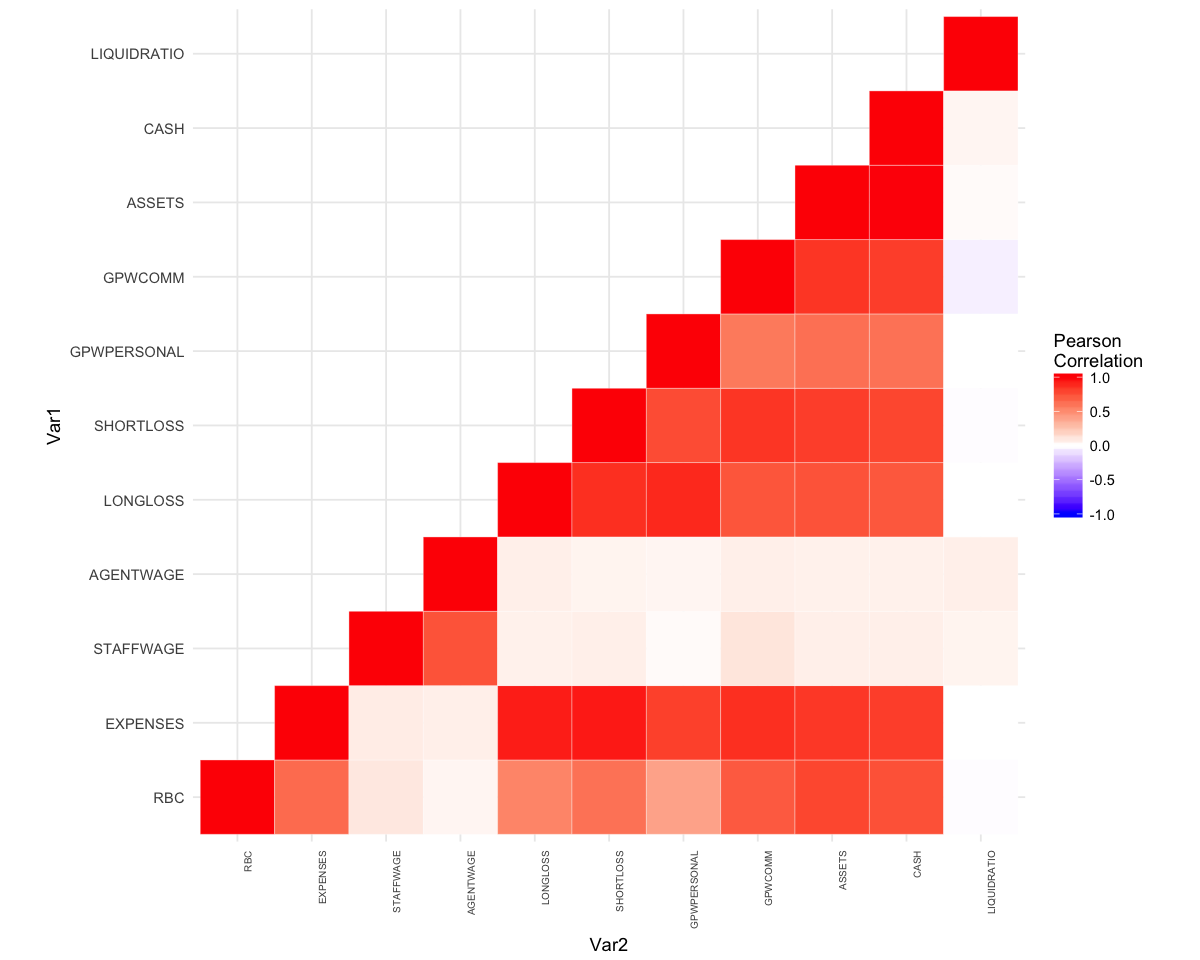

In [22]:
# Melt the correlation matrix
options(repr.plot.width=10, repr.plot.height=8)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 90, vjust = 2, 
    size = 6, hjust = 1))+
 coord_fixed()

From the below scatterplot matrix, we can see that some features are strongly correlated with response variable.

null device 
          1

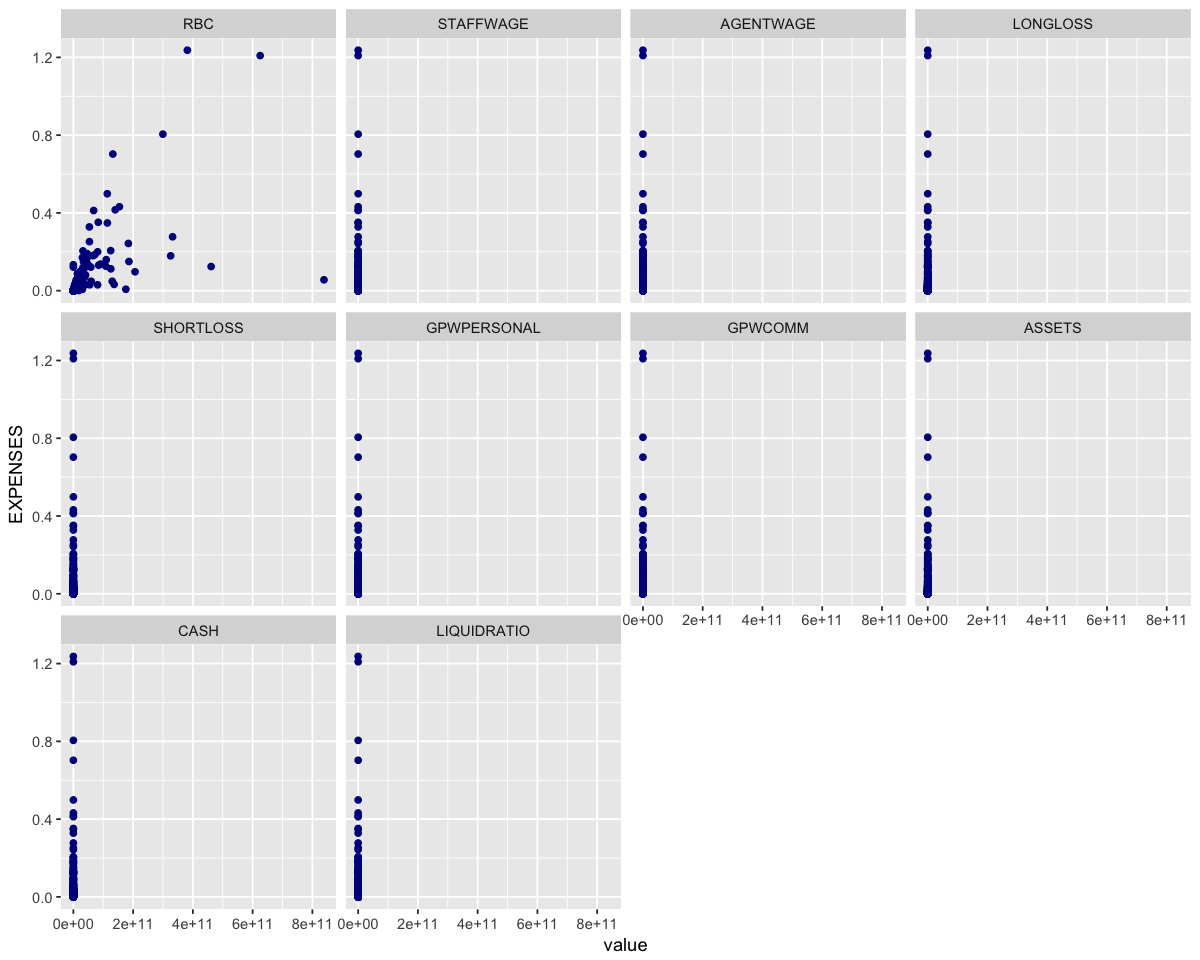

In [23]:
options(repr.plot.width=10, repr.plot.height=8)
m.Ndata = melt(NumData, id="EXPENSES", na.rm = TRUE)
#png("file5.png", width = 600,height = 1100)
ggplot(m.Ndata, aes(value, EXPENSES)) + facet_wrap(~ variable) + geom_point(color='darkblue') 
dev.off()

Following 7 features out of 11 numeric featurs are strongly correlated with target variable i.e. EXPENSES 

In [24]:
highly_corelated_w_response <- which(abs(cor_coef[,5])>=0.5)
for (i in names(highly_corelated_w_response)){
    if (i != "EXPENSES"){
        print(i)
    }
}

[1] "RBC"
[1] "LONGLOSS"
[1] "SHORTLOSS"
[1] "GPWPERSONAL"
[1] "GPWCOMM"
[1] "ASSETS"
[1] "CASH"


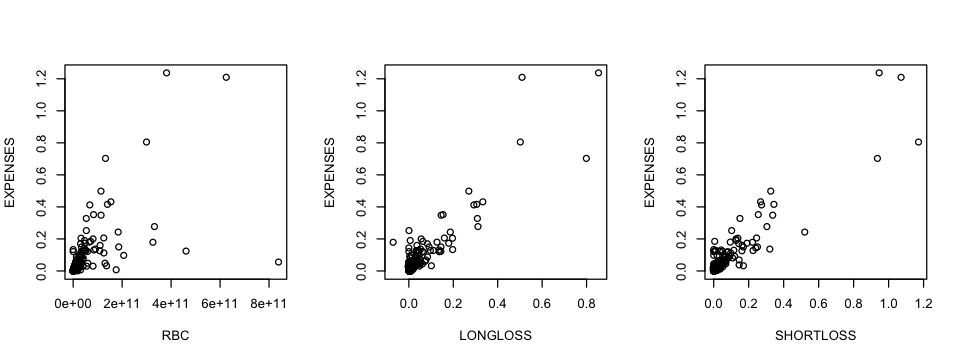

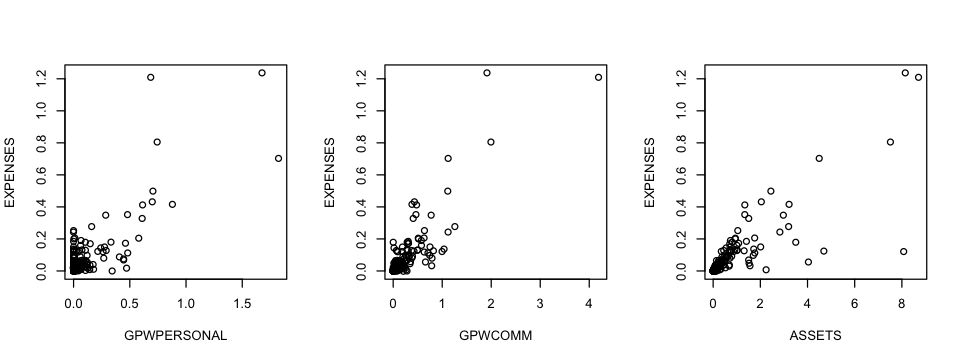

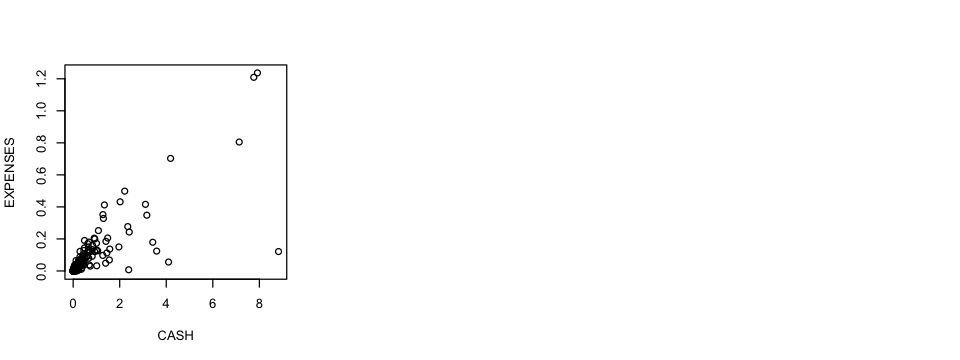

In [25]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1, 3))
for (i in names(highly_corelated_w_response)){
    if (i != "EXPENSES"){
        plot(Ndata[,i],Ndata$EXPENSES,xlab = i, ylab = "EXPENSES")
    }
}

Now let's check whether fetaures are correlated with each other or not. Creating a new dataframe after removing target variable.

From the below heat map, we can clearly see that many features are correlated with each other.

In [26]:
NData1 <- Ndata[,-c(1,2,3,5)]
cor_coef1 <- round(cor(NData1),2)

In [27]:
for (i in 1:nrow(cor_coef1)){
    for (j in 1:ncol(cor_coef1)){
        
        if(abs(cor_coef1[i,j]) <= 0.7){
            cor_coef1[i,j] <- NA
        }
        
        if(i==j){
            cor_coef1[i,j] <- NA
        }
    }
}
upper_tri <- get_upper_tri(cor_coef1)

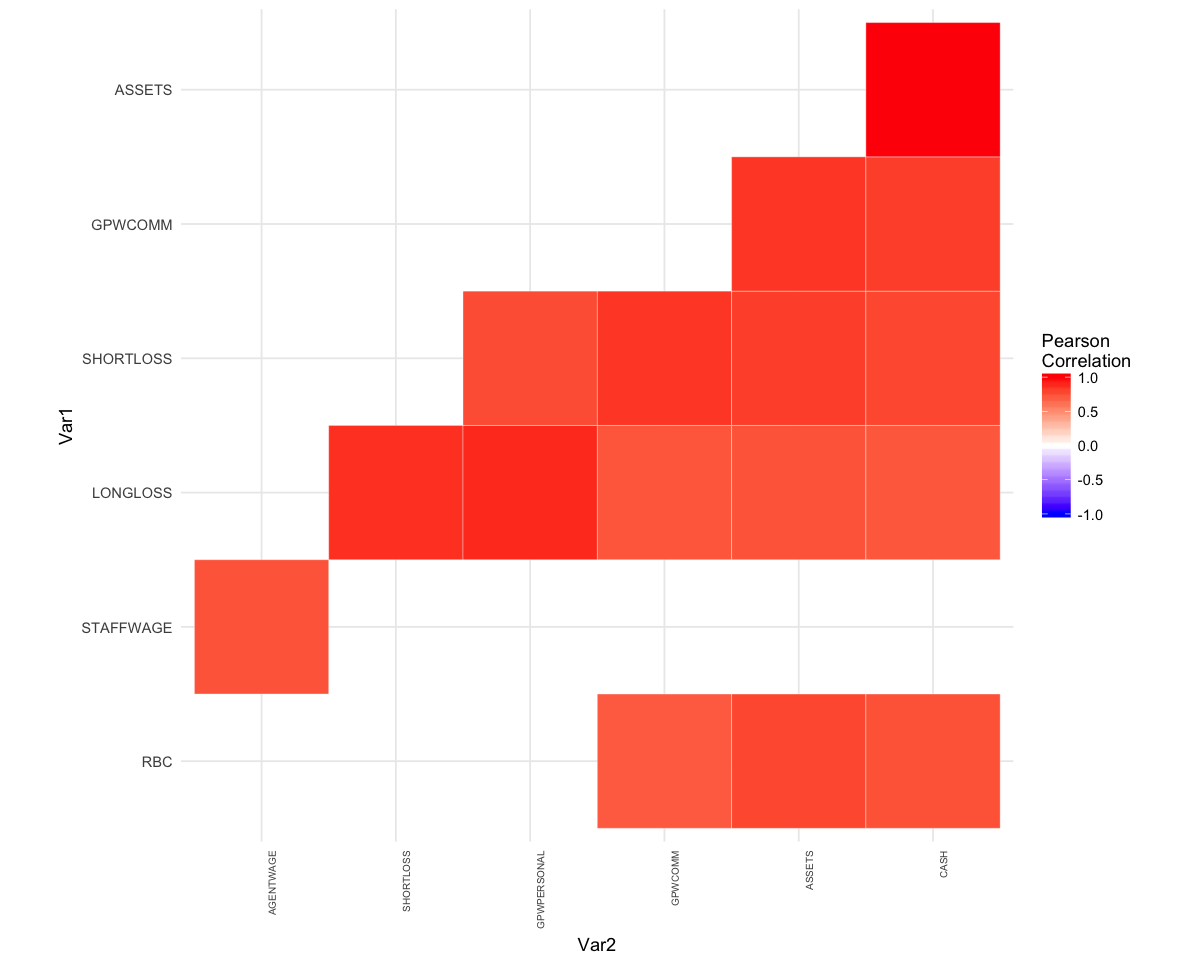

In [28]:
options(repr.plot.width=10, repr.plot.height=8)

melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 90, vjust = 2, 
    size = 6, hjust = 1))+
 coord_fixed()

Following features are strongly correlated with each other.

In [29]:
print(melted_cormat[order(abs(melted_cormat$value),decreasing = TRUE),])

        Var1        Var2 value
88    ASSETS        CASH  0.99
54  LONGLOSS GPWPERSONAL  0.89
44  LONGLOSS   SHORTLOSS  0.87
65 SHORTLOSS     GPWCOMM  0.85
77   GPWCOMM      ASSETS  0.85
75 SHORTLOSS      ASSETS  0.82
87   GPWCOMM        CASH  0.82
71       RBC      ASSETS  0.79
85 SHORTLOSS        CASH  0.79
55 SHORTLOSS GPWPERSONAL  0.77
81       RBC        CASH  0.75
22 STAFFWAGE   AGENTWAGE  0.74
74  LONGLOSS      ASSETS  0.74
64  LONGLOSS     GPWCOMM  0.73
84  LONGLOSS        CASH  0.72
61       RBC     GPWCOMM  0.71


There is perfect linear relationship between ASSETS and CASH.

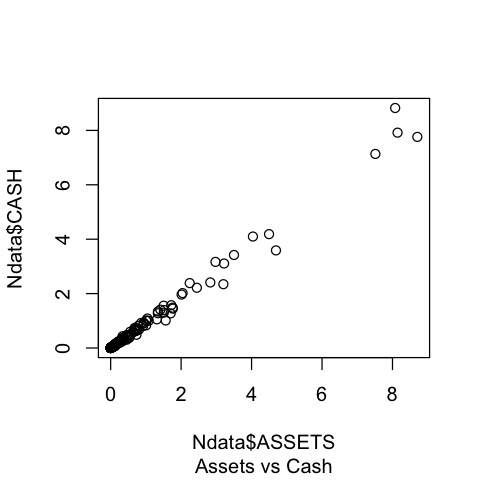

In [30]:
options(repr.plot.width=4, repr.plot.height=4)
plot(Ndata$ASSETS, Ndata$CASH,sub = "Assets vs Cash")

##### Splitted data into Training and Validation data

In [31]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(Ndata), 0.8*nrow(Ndata))  # row indices for training data
trainingData <- Ndata[c(trainingRowIndex), ]  # model training data
validationData  <- Ndata[-trainingRowIndex, ]   # test data

In [32]:
nrow(trainingData)

[1] 307

In [33]:
nrow(validationData)

[1] 77

### Model Building

##### Model 1

Build a first model with all independent variables. From the summary of the model, we can see many independent variables are not significant. This model explained 94% variations (R Squared is 94%.) but residuals is not normally distributed.

In [34]:
model1 = lm('EXPENSES ~ .', data=trainingData)

summary(model1)


Call:
lm(formula = "EXPENSES ~ .", data = trainingData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134226 -0.004208  0.000408  0.004281  0.152455 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.676e-03  1.958e-02  -0.239   0.8114    
GROUP       -2.455e-03  3.945e-03  -0.622   0.5342    
MUTUAL      -6.384e-03  6.020e-03  -1.060   0.2898    
STOCK       -4.063e-03  5.285e-03  -0.769   0.4427    
RBC          4.953e-14  3.970e-14   1.248   0.2132    
STAFFWAGE    2.819e-05  2.026e-04   0.139   0.8894    
AGENTWAGE   -1.988e-05  2.857e-04  -0.070   0.9446    
LONGLOSS     5.422e-01  5.812e-02   9.329  < 2e-16 ***
SHORTLOSS    2.726e-01  3.589e-02   7.597 4.11e-13 ***
GPWPERSONAL  1.157e-01  2.124e-02   5.447 1.08e-07 ***
GPWCOMM      9.562e-02  1.231e-02   7.770 1.33e-13 ***
ASSETS      -3.297e-02  2.199e-02  -1.499   0.1349    
CASH         3.878e-02  2.009e-02   1.930   0.0546 .  
LIQUIDRATIO  9.488e-05  1.057e-04   0.897   

We can see from below QQ plot and residuals plot that Residuals are not normally distributed.

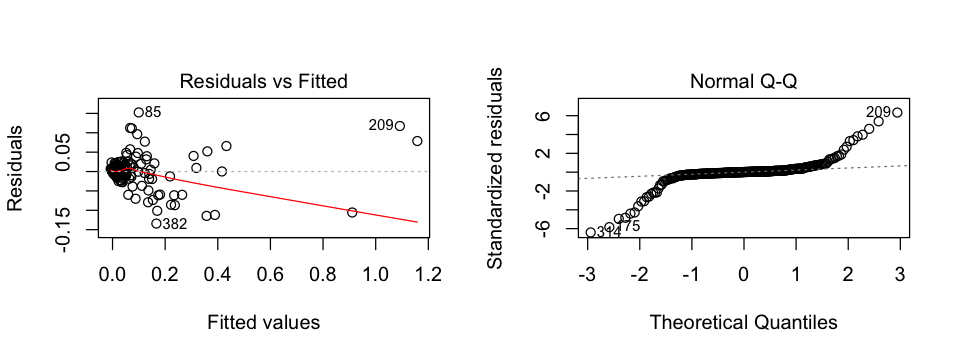

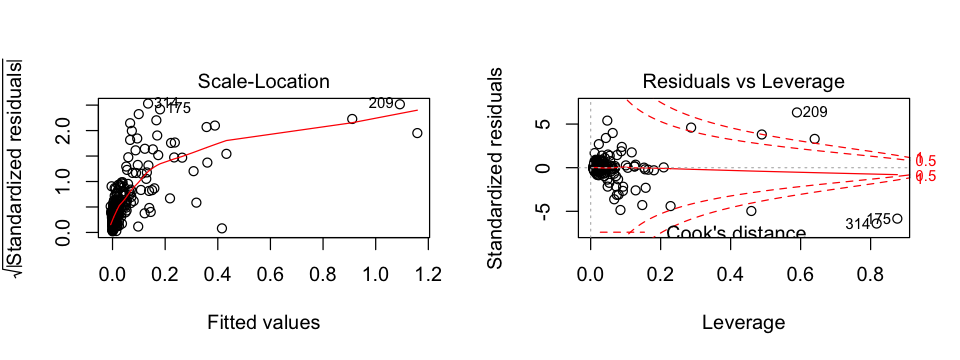

In [35]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1, 2))
plot(model1)

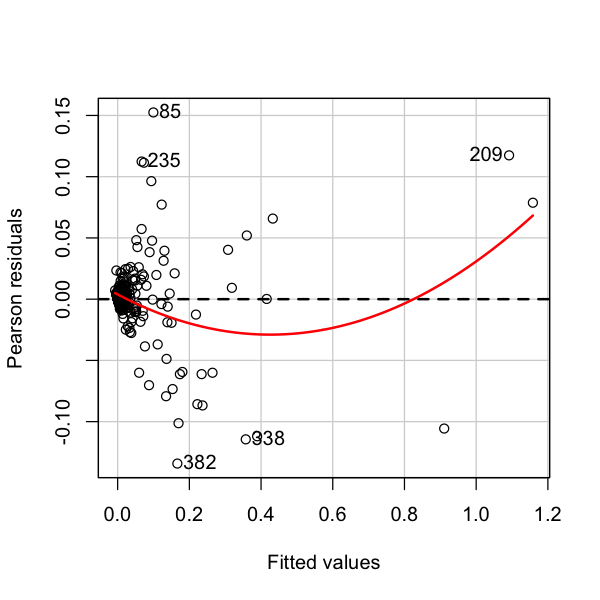

In [36]:
options(repr.plot.width=5, repr.plot.height=5)
residualPlot(model1, id.n=5)

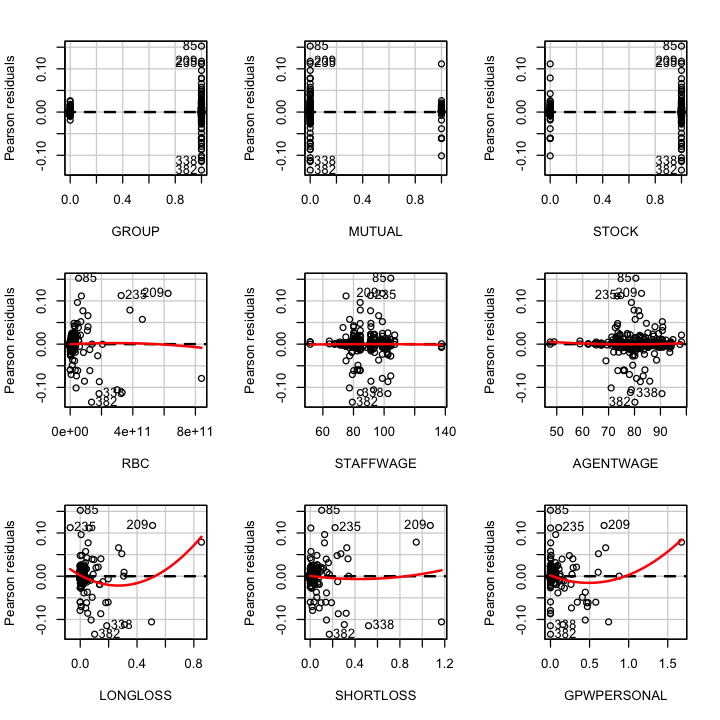

,Test stat,Pr(>|t|)
GROUP,-0.110,0.912
MUTUAL,0.225,0.822
STOCK,-0.264,0.792
RBC,-0.635,0.526
STAFFWAGE,-0.138,0.891
AGENTWAGE,0.439,0.661
LONGLOSS,5.009,0.000
SHORTLOSS,1.090,0.277
GPWPERSONAL,4.621,0.000
GPWCOMM,6.083,0.000


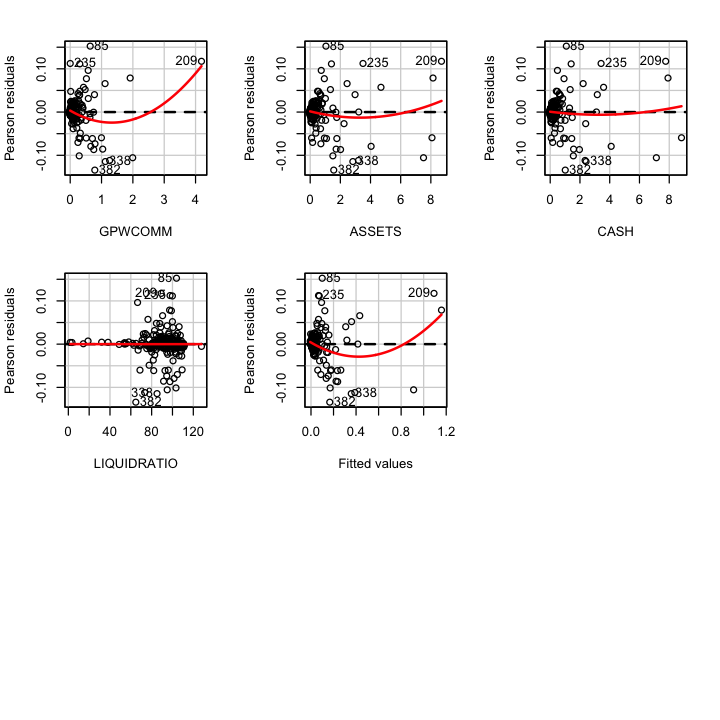

In [37]:
options(repr.plot.width=6, repr.plot.height=6)
residualPlots(model1, id.n=5)

From the above model summary and plots, we can see that there are many insignificant variables in this model, we need to understand why these variables are not significant. <br>
We need to check following:<br><br>
Is there any multi colinearity present? <br/>
Do we need to transform the IVs before modeling? <br />
Are Residuals normally disbributed and Random? <br />
Is Residual having equal variance or not?

As we already seen above, many independent variables are strongly correlated with each other and residuals also not normally distributed.

From the above residual plots, we can clearly see that there seems to be a some pattern which indicate something is wrong with our first model.<br>

Now, let's check whether pattern is because of influential observations or other issue.

##### Check for influential observations

From the below models and plots, following are influential observations.

1. RBC value of observation number 314 is the maximum value of RBC variable which is clearly a outlier
2. CASH value of observation number 175 is the maximum value of CASH variable which is clearly a outlier
3. GPWCOMM, ASSETS value of observation number 209 is the maximum value of GPWCOMM, ASSETS variable which is clearly a outlier
4. SHORTLOSS value of observation number 210 is the maximum value of SHORTLOSS variable which is clearly a outlier
5. LONGLOSS, EXPENSES value of observation number 248 is the maximum value of LONGLOSS, ASSETS variable which is clearly a outlier

After removing influentional observations number 175,209,210,314, we can see that there is no pattern in Fitted Value and Residual plot. We will note down that these observation are influentional observation.

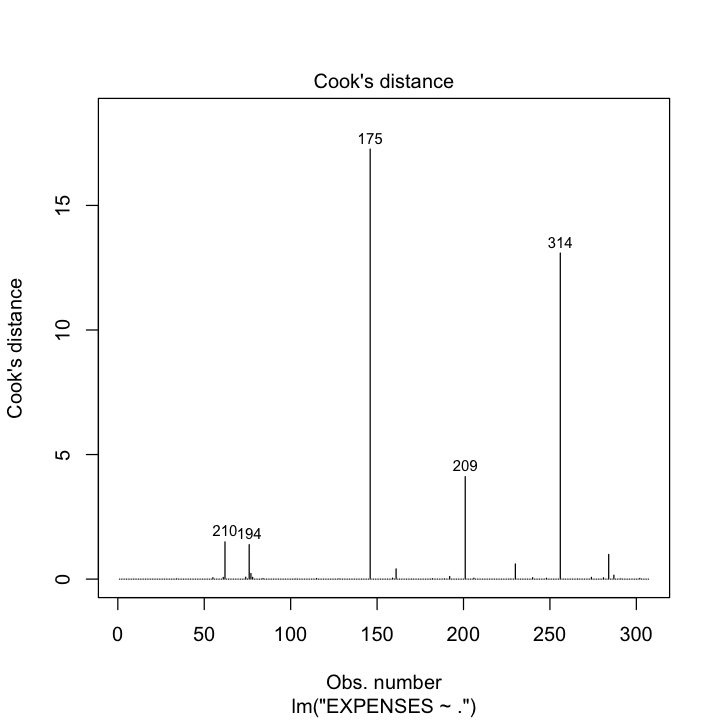

In [38]:
#influential observation
cutoff <- 4/((nrow(trainingData)-length(model1$coefficients)-2)) 
plot(model1, which=4, cook.levels=cutoff, id.n=5)

In [39]:
summary(Ndata)

     GROUP           MUTUAL           STOCK             RBC           
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000e+00  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:6.257e+08  
 Median :1.000   Median :0.0000   Median :1.0000   Median :2.753e+09  
 Mean   :0.612   Mean   :0.1875   Mean   :0.6823   Mean   :2.247e+10  
 3rd Qu.:1.000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.118e+10  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :8.388e+11  
    EXPENSES           STAFFWAGE        AGENTWAGE         LONGLOSS        
 Min.   :-0.002038   Min.   : 51.73   Min.   : 47.47   Min.   :-0.070623  
 1st Qu.: 0.001584   1st Qu.: 80.06   1st Qu.: 75.55   1st Qu.: 0.000000  
 Median : 0.008504   Median : 84.38   Median : 79.30   Median : 0.001784  
 Mean   : 0.043190   Mean   : 87.18   Mean   : 80.15   Mean   : 0.024926  
 3rd Qu.: 0.029826   3rd Qu.: 93.82   3rd Qu.: 85.08   3rd Qu.: 0.011280  
 Max.   : 1.236946   Max.   :137.48   Max.   :126.17 

In [40]:
Ndata[c(175,194,209,210,314),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
175,1,0,1,0,0.12112086,82.93979,84.02204,0.000000000,0.034645620,0.0000000,0.9969909,8.075764,8.823477,109.25873
194,1,0,1,461080847000,0.12407880,77.47405,80.24986,0.037851731,0.006479205,0.0000000,0.4243540,4.692395,3.588051,76.46524
209,1,0,1,625289743000,1.20922445,98.87186,82.70878,0.509665537,1.071371185,0.6860197,4.1894013,8.705380,7.761293,89.15514
210,1,0,1,299617735000,0.80515773,93.12702,78.76582,0.501866915,1.171058715,0.7432110,1.9944146,7.513959,7.134663,94.95211
314,1,0,1,838796661000,0.05578365,98.87186,80.76107,-0.001291716,0.021297705,0.0000000,0.6586791,4.038598,4.098353,101.47959


In [41]:
Ndata[Ndata$RBC==max(Ndata$RBC) & Ndata$RBC > IQR(Ndata$RBC),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
314,1,0,1,838796661000,0.05578365,98.87186,80.76107,-0.001291716,0.02129771,0,0.6586791,4.038598,4.098353,101.4796


In [42]:
Ndata[Ndata$CASH==max(Ndata$CASH) & Ndata$CASH > IQR(Ndata$CASH),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
175,1,0,1,0,0.1211209,82.93979,84.02204,0,0.03464562,0,0.9969909,8.075764,8.823477,109.2587


In [43]:
Ndata[Ndata$GPWCOMM==max(Ndata$GPWCOMM) & Ndata$GPWCOMM > IQR(Ndata$GPWCOMM),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
209,1,0,1,625289743000,1.209224,98.87186,82.70878,0.5096655,1.071371,0.6860197,4.189401,8.70538,7.761293,89.15514


In [44]:
Ndata[Ndata$ASSETS==max(Ndata$ASSETS) & Ndata$ASSETS > IQR(Ndata$ASSETS),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
209,1,0,1,625289743000,1.209224,98.87186,82.70878,0.5096655,1.071371,0.6860197,4.189401,8.70538,7.761293,89.15514


In [45]:
Ndata[Ndata$SHORTLOSS==max(Ndata$SHORTLOSS) & Ndata$SHORTLOSS > IQR(Ndata$SHORTLOSS),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
210,1,0,1,299617735000,0.8051577,93.12702,78.76582,0.5018669,1.171059,0.743211,1.994415,7.513959,7.134663,94.95211


1. RBC value of observation number 314 is the maximum value of RBC variable which is clearly a outlier
2. CASH value of observation number 175 is the maximum value of CASH variable which is clearly a outlier
3. GPWCOMM, ASSETS value of observation number 209 is the maximum value of GPWCOMM, ASSETS variable which is clearly a outlier
4. SHORTLOSS value of observation number 210 is the maximum value of SHORTLOSS variable which is clearly a outlier

To Check impact of influential observations, let's delete the observation and check residual patterns.

In [46]:
trainingRowIndex1 <- trainingRowIndex[trainingRowIndex != 175 & trainingRowIndex != 209 & trainingRowIndex != 210 & trainingRowIndex != 314 ]
trainingData1 <- Ndata[c(trainingRowIndex1), ]  # model training data

In [48]:
model2 = lm('EXPENSES ~ .', data=trainingData1)

summary(model2)


Call:
lm(formula = "EXPENSES ~ .", data = trainingData1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.123795 -0.003898 -0.001275  0.002952  0.145643 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.171e-03  1.660e-02   0.071 0.943812    
GROUP       -9.696e-04  3.401e-03  -0.285 0.775798    
MUTUAL      -2.972e-03  5.120e-03  -0.581 0.561972    
STOCK        3.853e-04  4.501e-03   0.086 0.931832    
RBC         -1.113e-13  1.213e-13  -0.917 0.359648    
STAFFWAGE    4.408e-05  1.723e-04   0.256 0.798305    
AGENTWAGE    2.084e-05  2.426e-04   0.086 0.931618    
LONGLOSS     5.234e-01  5.295e-02   9.885  < 2e-16 ***
SHORTLOSS    2.007e-01  4.487e-02   4.472 1.11e-05 ***
GPWPERSONAL  8.006e-02  1.877e-02   4.265 2.71e-05 ***
GPWCOMM      5.359e-02  1.430e-02   3.748 0.000215 ***
ASSETS      -7.035e-02  3.114e-02  -2.259 0.024606 *  
CASH         1.189e-01  2.609e-02   4.557 7.68e-06 ***
LIQUIDRATIO -4.796e-05  9.109e-05  -0.527 0

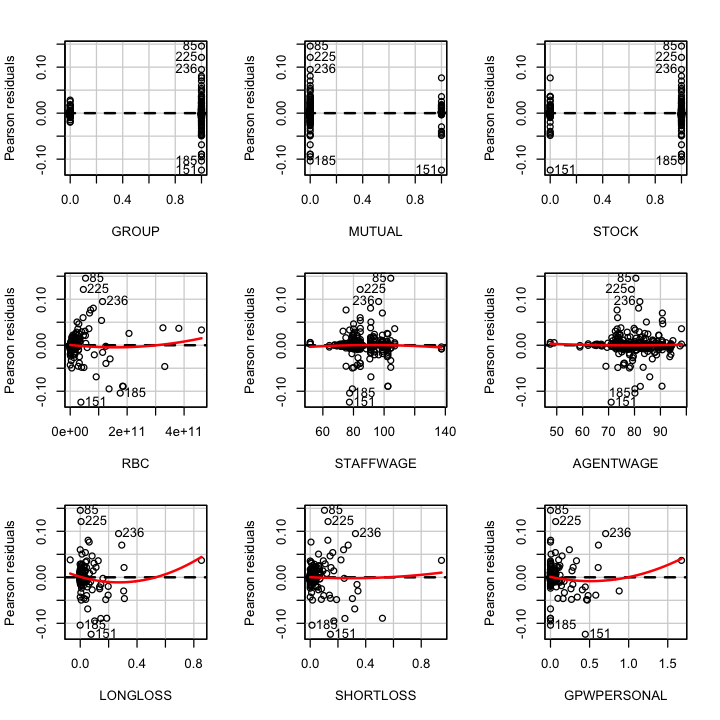

,Test stat,Pr(>|t|)
GROUP,0.434,0.665
MUTUAL,-0.066,0.948
STOCK,0.292,0.771
RBC,1.454,0.147
STAFFWAGE,-0.559,0.577
AGENTWAGE,0.310,0.756
LONGLOSS,2.985,0.003
SHORTLOSS,0.687,0.493
GPWPERSONAL,2.936,0.004
GPWCOMM,-0.232,0.816


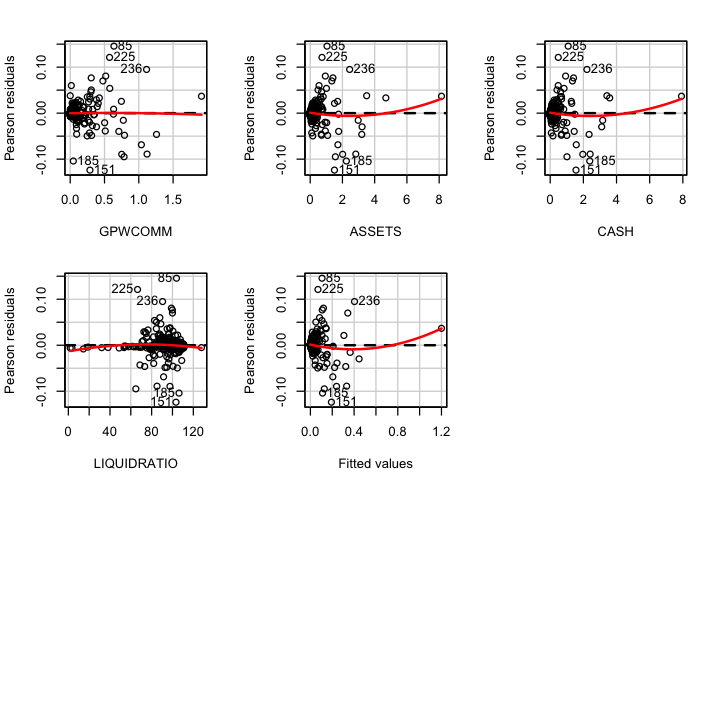

In [49]:
options(repr.plot.width=6, repr.plot.height=6)
residualPlots(model2, id.n=5)

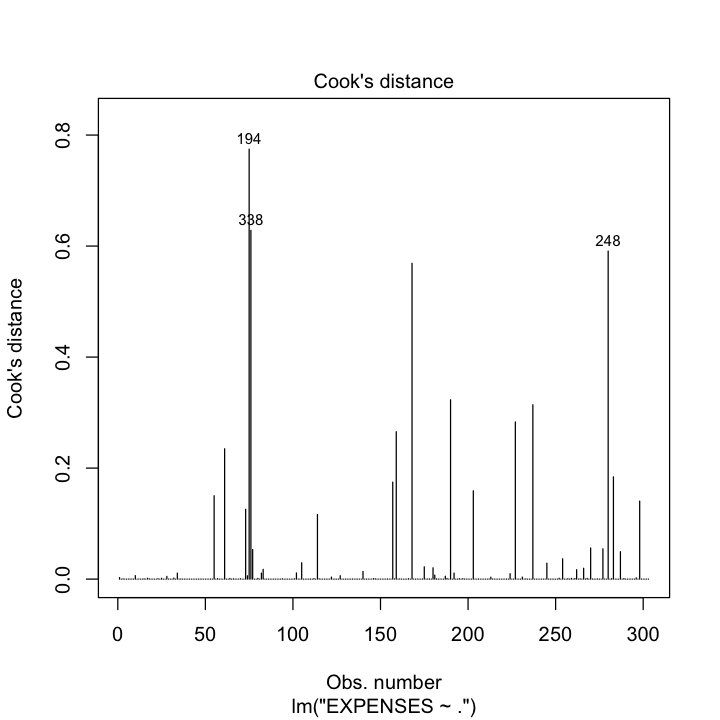

In [50]:
#influential observation
cutoff <- 4/((nrow(trainingData1)-length(model2$coefficients)-2)) 
plot(model2, which=4, cook.levels=cutoff)

LONGLOSS, EXPENSES value of observation number 248 is the maximum value of LONGLOSS, ASSETS variable which is clearly a outlier

In [51]:
Ndata[Ndata$LONGLOSS==max(Ndata$LONGLOSS) & Ndata$LONGLOSS > IQR(Ndata$LONGLOSS),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
248,1,0,0,381549850000,1.236946,84.47486,79.82682,0.8539152,0.9460711,1.675727,1.913765,8.14388,7.917615,97.22165


In [52]:
Ndata[Ndata$EXPENSES==max(Ndata$EXPENSES) & Ndata$EXPENSES > IQR(Ndata$EXPENSES),]

,GROUP,MUTUAL,STOCK,RBC,EXPENSES,STAFFWAGE,AGENTWAGE,LONGLOSS,SHORTLOSS,GPWPERSONAL,GPWCOMM,ASSETS,CASH,LIQUIDRATIO
248,1,0,0,381549850000,1.236946,84.47486,79.82682,0.8539152,0.9460711,1.675727,1.913765,8.14388,7.917615,97.22165


In [53]:
trainingRowIndex1 <- trainingRowIndex[trainingRowIndex != 175 & trainingRowIndex != 209 & trainingRowIndex != 210 & trainingRowIndex != 314 & trainingRowIndex != 248]
trainingData1 <- Ndata[c(trainingRowIndex1), ]  # model training data
nrow(trainingData1)

[1] 302

In [54]:
model3 = lm('EXPENSES ~ .', data=trainingData1)

summary(model3)


Call:
lm(formula = "EXPENSES ~ .", data = trainingData1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.115301 -0.004751 -0.001402  0.002520  0.146289 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.298e-03  1.657e-02  -0.199   0.8424    
GROUP       -1.736e-04  3.391e-03  -0.051   0.9592    
MUTUAL      -1.315e-03  5.126e-03  -0.257   0.7976    
STOCK        1.399e-03  4.485e-03   0.312   0.7553    
RBC         -6.443e-14  1.219e-13  -0.528   0.5976    
STAFFWAGE    3.980e-05  1.710e-04   0.233   0.8161    
AGENTWAGE    6.663e-05  2.414e-04   0.276   0.7828    
LONGLOSS     4.921e-01  5.415e-02   9.087  < 2e-16 ***
SHORTLOSS    1.978e-01  4.453e-02   4.443 1.27e-05 ***
GPWPERSONAL  7.961e-02  1.862e-02   4.275 2.60e-05 ***
GPWCOMM      5.827e-02  1.432e-02   4.069 6.10e-05 ***
ASSETS      -6.972e-02  3.089e-02  -2.257   0.0248 *  
CASH         1.117e-01  2.605e-02   4.290 2.45e-05 ***
LIQUIDRATIO -4.177e-05  9.039e-05  -0.462  

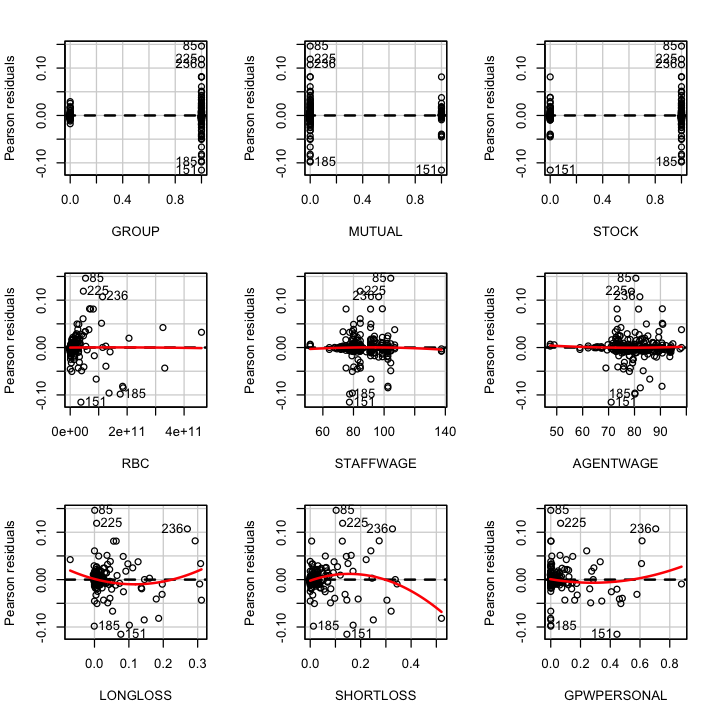

,Test stat,Pr(>|t|)
GROUP,-0.270,0.787
MUTUAL,-0.524,0.601
STOCK,-0.107,0.915
RBC,-0.129,0.898
STAFFWAGE,-0.483,0.629
AGENTWAGE,0.411,0.681
LONGLOSS,3.021,0.003
SHORTLOSS,-4.483,0.000
GPWPERSONAL,1.991,0.047
GPWCOMM,-3.807,0.000


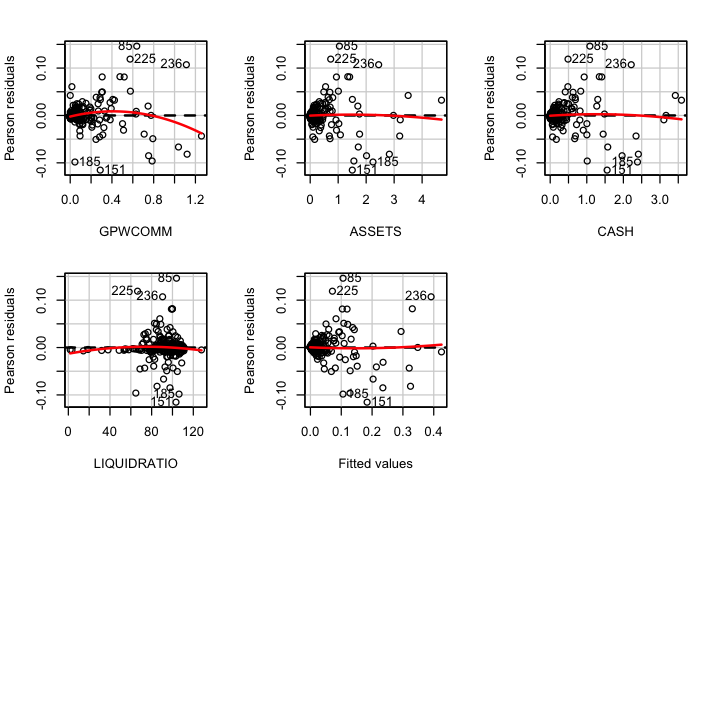

In [55]:
options(repr.plot.width=6, repr.plot.height=6)
residualPlots(model3, id.n=5)

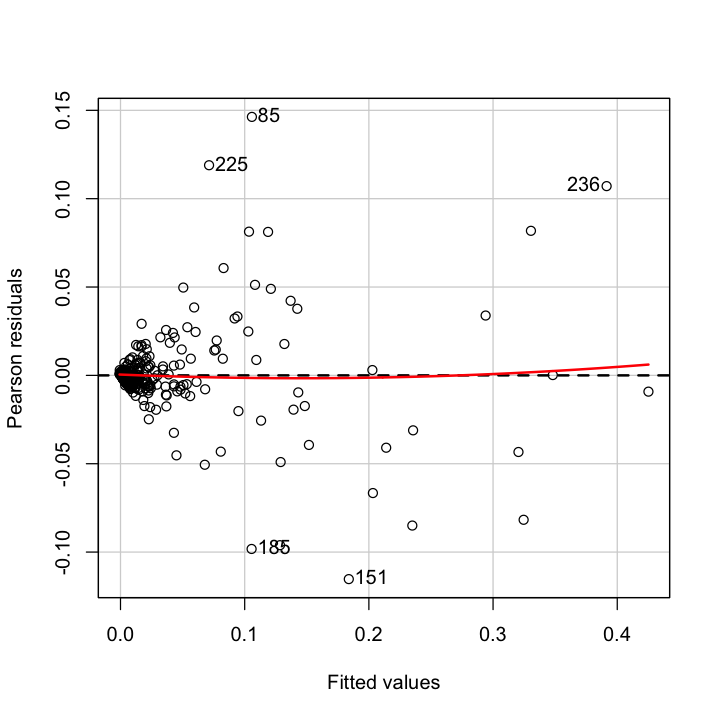

In [56]:
residualPlot(model3, id.n=5)

After removing influentional observations number 175,209,210,314, we can see that there is no pattern in above plot between Fitted Value and Residual. We will noted down that these observation are influentional observation.

##### Model 2 - Transformation

As in second model, we can see that residuals seems normally distributed. Now, lets tranform indendent variables (IVs) as well. As we seen above from the box plot and residual plot of above model, we need following transformation on IVs.

1. RBC: Quadratic trasformation
2. LongLoss: Quadratic trasformation
3. ShortLoss : Quadratic trasformation
4. GPWPERSONAL: Sqrt trasformation
5. GPWCOMM: Quadratic trasformation
6. ASSETS: Quadratic trasformation
7. Cash: Quadratic transformation
8. LiquidRate: Quadratic transformation

In [57]:
trainingData1 <- trainingData

trainingData1$RBC_sq <- trainingData1$RBC^2

trainingData1$LONGLOSS_sq <- trainingData1$LONGLOSS^2
trainingData1$SHORTLOSS_sq <- trainingData1$SHORTLOSS^2
trainingData1$GPWPERSONAL <- trainingData1$GPWPERSONAL^0.5

trainingData1$GPWCOMM_sq <- trainingData1$GPWCOMM^2
trainingData1$ASSET_sq <- trainingData1$ASSET^2
trainingData1$CASH_sq <- trainingData1$CASH^2
trainingData1$LIQUIDRATIO_sq <- trainingData1$LIQUIDRATIO^2

In [58]:
model4 = lm('EXPENSES ~ .', data=trainingData1)

summary(model4)


Call:
lm(formula = "EXPENSES ~ .", data = trainingData1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107289 -0.005336 -0.000387  0.003136  0.120372 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.738e-02  1.825e-02  -0.952  0.34193    
GROUP          -1.978e-03  3.300e-03  -0.599  0.54939    
MUTUAL         -2.848e-03  4.854e-03  -0.587  0.55793    
STOCK          -2.312e-04  4.226e-03  -0.055  0.95640    
RBC             1.061e-13  1.574e-13   0.674  0.50083    
STAFFWAGE       9.253e-05  1.615e-04   0.573  0.56723    
AGENTWAGE       1.923e-05  2.269e-04   0.085  0.93252    
LONGLOSS        4.263e-01  7.205e-02   5.917 9.55e-09 ***
SHORTLOSS       4.118e-01  6.283e-02   6.555 2.67e-10 ***
GPWPERSONAL     1.763e-02  1.115e-02   1.581  0.11507    
GPWCOMM         6.790e-02  1.902e-02   3.570  0.00042 ***
ASSETS         -2.497e-01  5.297e-02  -4.714 3.84e-06 ***
CASH            2.829e-01  4.418e-02   6.403 6.40e-10 ***
L

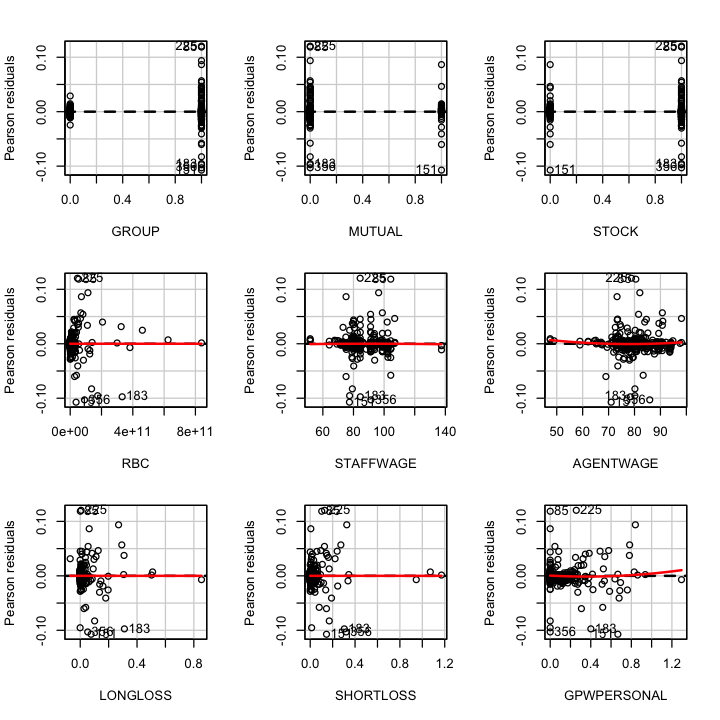

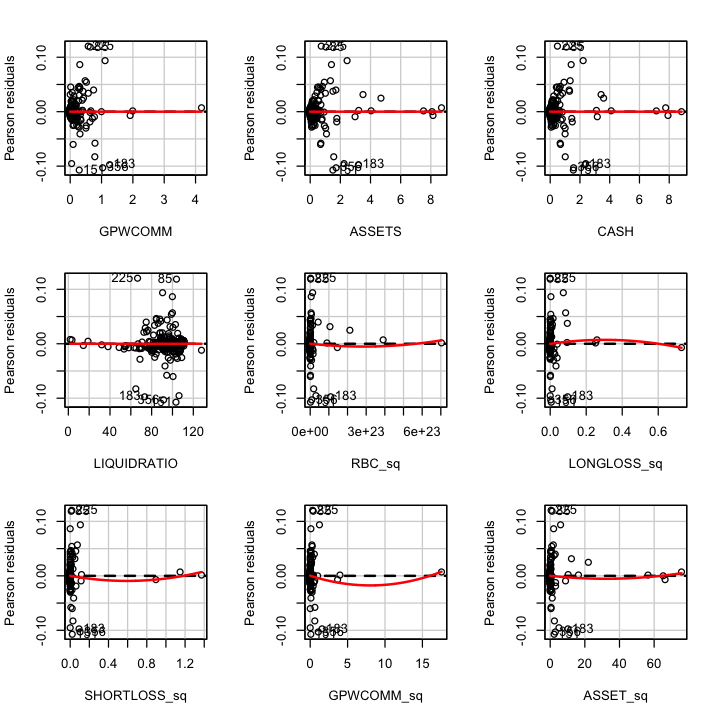

,Test stat,Pr(>|t|)
GROUP,-0.335,0.738
MUTUAL,0.638,0.524
STOCK,0.185,0.853
RBC,-0.185,0.854
STAFFWAGE,-0.104,0.917
AGENTWAGE,0.710,0.478
LONGLOSS,-1.447,0.149
SHORTLOSS,0.347,0.729
GPWPERSONAL,1.367,0.173
GPWCOMM,0.553,0.581


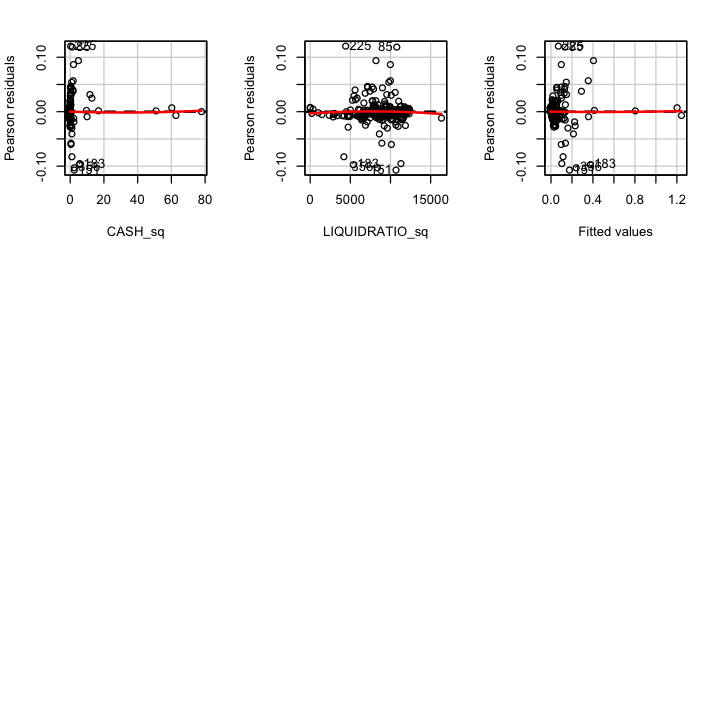

In [59]:
options(repr.plot.width=6, repr.plot.height=6)
residualPlots(model4, id.n=5)

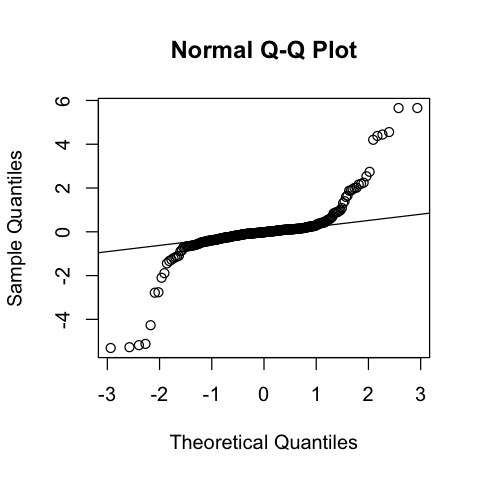

In [61]:
#QQ-plot of the residuals
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(rstandard(model4))
qqline(rstandard(model4))

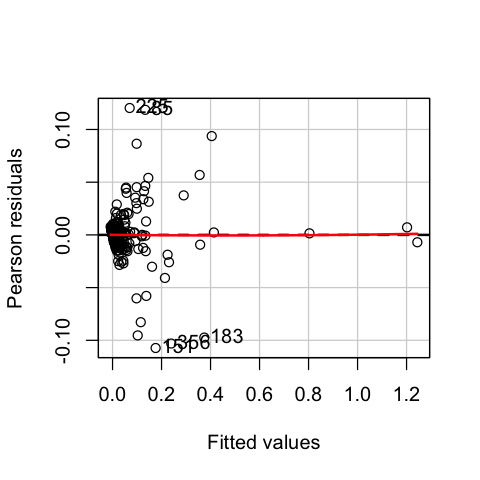

In [62]:
residualPlot(model4, id.n=5)

##### Check for collinearity among regressors

We can see from below VIF output that many predictor variables are having VIF more than 30. It means many variables are correlated with each other.

In [63]:
vif_output <- vif(model4)
print(vif_output[order(vif_output, decreasing = TRUE)])

        ASSETS       ASSET_sq           CASH        CASH_sq            RBC 
   1941.323433    1503.351723    1241.224418     885.705645      90.245374 
  SHORTLOSS_sq         RBC_sq      SHORTLOSS     GPWCOMM_sq        GPWCOMM 
     37.564202      35.385566      32.485369      31.407474      24.434233 
LIQUIDRATIO_sq    LIQUIDRATIO    LONGLOSS_sq       LONGLOSS    GPWPERSONAL 
     20.924583      19.752434      19.050010      18.731891       2.847735 
         STOCK         MUTUAL      STAFFWAGE      AGENTWAGE          GROUP 
      2.338970       2.125056       1.948316       1.927808       1.534150 


Now, Let's check the condition indices of the correlation matrix of the predictor variables to find out which variables are stongly correlated to each other.

From the below output, we can see that following variables are strongly correlated each other:


CASH<br>
ASSETS<br>
ASSET_sq<br>
CASH_sq

In [64]:
colldiag(trainingData1, center = TRUE)

Condition
Index	Variance Decomposition Proportions
            GROUP MUTUAL STOCK RBC   EXPENSES STAFFWAGE AGENTWAGE LONGLOSS
1     1.000 0.000 0.000  0.000 0.000 0.000    0.000     0.000     0.000   
2     2.207 0.031 0.026  0.022 0.000 0.000    0.003     0.002     0.000   
3     2.314 0.024 0.042  0.052 0.000 0.000    0.025     0.024     0.000   
4     2.493 0.001 0.020  0.022 0.000 0.000    0.112     0.118     0.000   
5     2.688 0.020 0.002  0.006 0.001 0.001    0.012     0.008     0.003   
6     3.222 0.198 0.075  0.004 0.001 0.000    0.001     0.007     0.000   
7     3.764 0.099 0.014  0.004 0.001 0.001    0.000     0.004     0.002   
8     4.090 0.122 0.057  0.001 0.001 0.000    0.006     0.009     0.005   
9     5.206 0.428 0.017  0.130 0.000 0.000    0.011     0.013     0.002   
10    5.539 0.000 0.024  0.026 0.000 0.000    0.682     0.615     0.000   
11    6.360 0.017 0.608  0.631 0.000 0.000    0.079     0.129     0.000   
12    6.983 0.006 0.006  0.013 0.002 0.005    0.0

As many predictors are not significant in model 4 and as we have already seen that many predictors are strongly correlated with each other. Let's do variable selection method to select variables which explain maximum variation of response variable. 

We used Backward Elimination method to select variables.

Backward elimination, which starts with all predictor variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose squared loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit. (Source: https://en.wikipedia.org/wiki/Stepwise_regression)

In [65]:
step <- stepAIC(model4, direction="backward")
step$anova

Start:  AIC=-2260.3
EXPENSES ~ GROUP + MUTUAL + STOCK + RBC + STAFFWAGE + AGENTWAGE + 
    LONGLOSS + SHORTLOSS + GPWPERSONAL + GPWCOMM + ASSETS + CASH + 
    LIQUIDRATIO + RBC_sq + LONGLOSS_sq + SHORTLOSS_sq + GPWCOMM_sq + 
    ASSET_sq + CASH_sq + LIQUIDRATIO_sq

                 Df Sum of Sq     RSS     AIC
- STOCK           1 0.0000015 0.14346 -2262.3
- AGENTWAGE       1 0.0000037 0.14346 -2262.3
- STAFFWAGE       1 0.0001681 0.14363 -2261.9
- MUTUAL          1 0.0001763 0.14363 -2261.9
- GROUP           1 0.0001841 0.14364 -2261.9
- RBC             1 0.0002328 0.14369 -2261.8
<none>                        0.14346 -2260.3
- GPWCOMM_sq      1 0.0012155 0.14467 -2259.8
- LIQUIDRATIO     1 0.0012235 0.14468 -2259.7
- GPWPERSONAL     1 0.0012802 0.14474 -2259.6
- RBC_sq          1 0.0017571 0.14521 -2258.6
- LIQUIDRATIO_sq  1 0.0018308 0.14529 -2258.5
- GPWCOMM         1 0.0065286 0.14999 -2248.9
- ASSET_sq        1 0.0080232 0.15148 -2245.9
- LONGLOSS_sq     1 0.0098405 0.15330 -2242.

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,280,0.1434568,-2260.298
- STOCK,1,1.534184e-06,281,0.1434583,-2262.295
- AGENTWAGE,1,4.213648e-06,282,0.1434625,-2264.286
- GROUP,1,2.133508e-04,283,0.1436759,-2265.839
- MUTUAL,1,1.865670e-04,284,0.1438625,-2267.448
- RBC,1,2.683551e-04,285,0.1441308,-2268.887
- STAFFWAGE,1,3.851756e-04,286,0.1445160,-2270.084


In [66]:
model4.1 = lm(EXPENSES ~ LONGLOSS + SHORTLOSS + GPWPERSONAL + GPWCOMM + ASSETS + 
    CASH + LIQUIDRATIO + RBC_sq + LONGLOSS_sq + SHORTLOSS_sq + 
    GPWCOMM_sq + ASSET_sq + CASH_sq + LIQUIDRATIO_sq, data=trainingData1)

summary(model4.1)


Call:
lm(formula = EXPENSES ~ LONGLOSS + SHORTLOSS + GPWPERSONAL + 
    GPWCOMM + ASSETS + CASH + LIQUIDRATIO + RBC_sq + LONGLOSS_sq + 
    SHORTLOSS_sq + GPWCOMM_sq + ASSET_sq + CASH_sq + LIQUIDRATIO_sq, 
    data = trainingData1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113996 -0.004815 -0.000128  0.003043  0.119037 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.347e-03  1.276e-02  -0.576 0.565357    
LONGLOSS        4.073e-01  6.057e-02   6.724 9.58e-11 ***
SHORTLOSS       3.985e-01  6.077e-02   6.558 2.55e-10 ***
GPWPERSONAL     1.594e-02  1.057e-02   1.507 0.132929    
GPWCOMM         6.630e-02  1.800e-02   3.683 0.000276 ***
ASSETS         -2.303e-01  4.323e-02  -5.328 2.02e-07 ***
CASH            2.723e-01  4.039e-02   6.741 8.65e-11 ***
LIQUIDRATIO     4.744e-04  3.406e-04   1.393 0.164780    
RBC_sq         -1.866e-25  4.170e-26  -4.476 1.10e-05 ***
LONGLOSS_sq     5.640e-01  9.551e-02   5.905 1.00e-08 ***


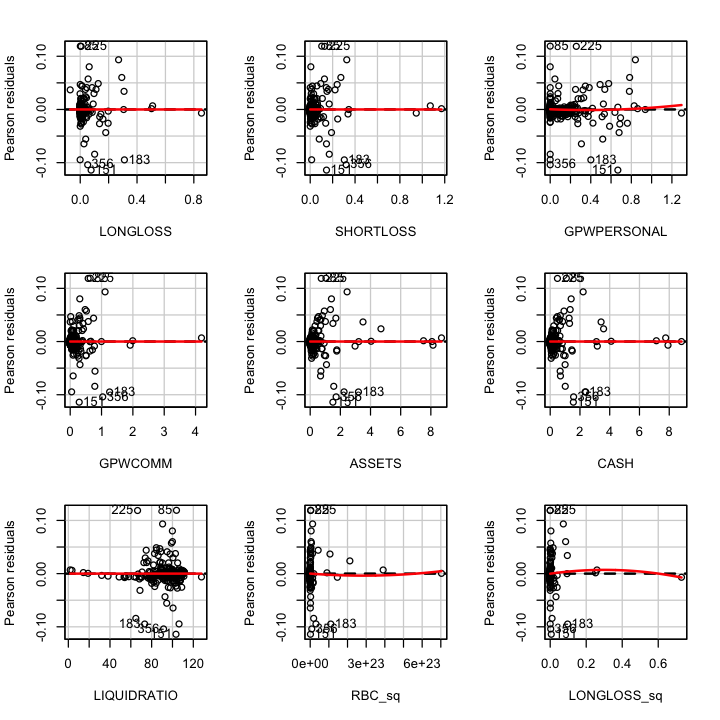

,Test stat,Pr(>|t|)
LONGLOSS,-0.799,0.425
SHORTLOSS,0.816,0.415
GPWPERSONAL,1.015,0.311
GPWCOMM,0.101,0.919
ASSETS,0.676,0.499
CASH,-1.038,0.300
LIQUIDRATIO,0.216,0.829
RBC_sq,1.701,0.090
LONGLOSS_sq,-1.967,0.050
SHORTLOSS_sq,1.976,0.049


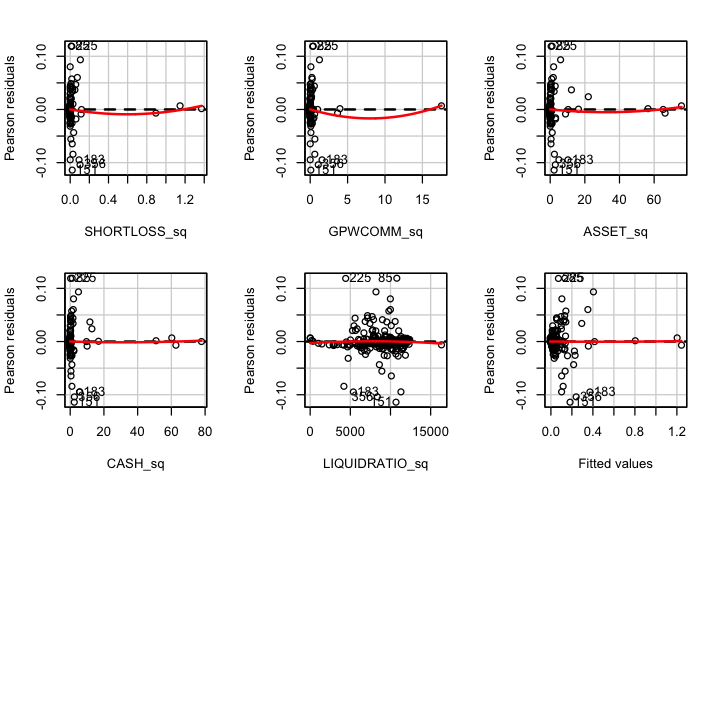

In [67]:
options(repr.plot.width=6, repr.plot.height=6)
residualPlots(model4.1, id.n=5)

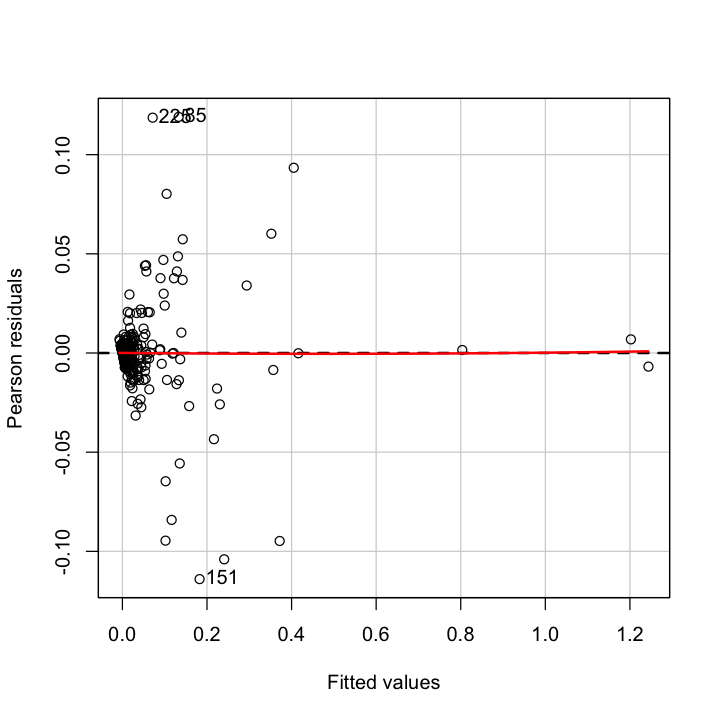

In [69]:
residualPlot(model4.1, id.n=3)

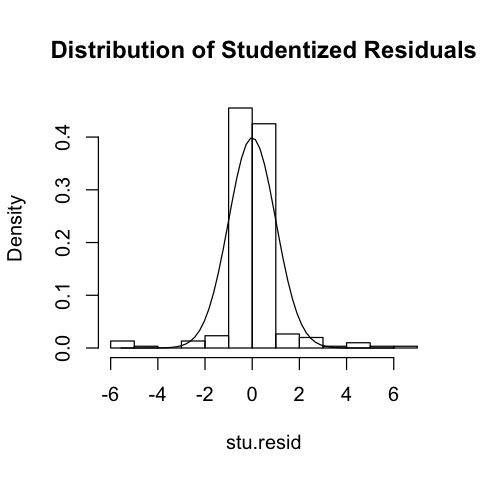

In [70]:
options(repr.plot.width=4, repr.plot.height=4)
stu.resid <- studres(model4.1) 
hist(stu.resid, freq=FALSE, main="Distribution of Studentized Residuals") 
xfit<-seq(min(stu.resid),max(stu.resid),length=60)
yfit<-dnorm(xfit)
lines(xfit, yfit)

##### Validation

In [71]:
validationData1 <- validationData

validationData1$RBC_sq <- validationData1$RBC^2

validationData1$LONGLOSS_sq <- validationData1$LONGLOSS^2
validationData1$SHORTLOSS_sq <- validationData1$SHORTLOSS^2
validationData1$GPWPERSONAL <- validationData1$GPWPERSONAL^0.5

validationData1$GPWCOMM_sq <- validationData1$GPWCOMM^2
validationData1$ASSET_sq <- validationData1$ASSET^2
validationData1$CASH_sq <- validationData1$CASH^2
validationData1$LIQUIDRATIO_sq <- validationData1$LIQUIDRATIO^2

In [72]:
y_hat <- predict.lm(model4.1, newdata = validationData1, se.fit = TRUE)$fit
y_hat <- as.vector(y_hat)

dev <- validationData1$EXPENSES - y_hat
num <- sum(dev^2, na.rm = TRUE)

dev1 <- validationData1$EXPENSES - mean(validationData1$EXPENSES)
den <- sum(dev1^2, na.rm = TRUE)

Predicted.Rsq <- 1 - (num/den)
print(Predicted.Rsq)

[1] 0.837052
